In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mef,mze,

In [1657]:
MLFLOW = False

In [1658]:
import pandas as pd
from pathlib import Path

def load_all_metrics_files(path):
    """
    Parcourt tous les sous-dossiers de `path`, charge les fichiers `df_metrics.csv`,
    et les combine en un seul DataFrame global.

    Parameters:
    - path (Path): Le chemin du dossier racine à parcourir.

    Returns:
    - pd.DataFrame: Le DataFrame global combinant tous les fichiers `df_metrics.csv`.
    """
    path = Path(path)
    all_metrics = []  # Liste pour stocker tous les DataFrames

    # Parcourir tous les sous-dossiers et rechercher les fichiers df_metrics.csv
    for file in path.rglob('df_metrics*.csv'):
        try:
            # Charger le fichier CSV dans un DataFrame
            df = pd.read_csv(file)

            # Ajouter une colonne pour identifier la source du fichier
            df['source'] = str(file.parent)  # Ajouter le chemin du dossier parent

            # Ajouter le DataFrame à la liste
            all_metrics.append(df) 
        except Exception as e:
            print(f"Erreur lors du chargement de {file}: {e}")

    # Combiner tous les DataFrames en un seul DataFrame global
    if all_metrics:
        df_global = pd.concat(all_metrics, ignore_index=True)
    else:
        df_global = pd.DataFrame()  # Si aucun fichier trouvé, retourne un DataFrame vide

    return df_global

if not MLFLOW:
    # Utilisation de la fonction
    path = Path('../GNN/firemen/firepoint/2x2/test/occurence_default')
    df = load_all_metrics_files(path)

In [1659]:
df.to_csv('try.csv')

In [1660]:
if MLFLOW:
    metric = 'bad_prediction_modified_nbsinister_max_1'
    df = pd.read_csv(f'{metric}.csv')

    metric = 'wildfire_over_predicted_modified_nbsinister_max_1'
    df1 = pd.read_csv(f'{metric}.csv')

    metric = 'iou_modified_nbsinister_max_1'
    df2 = pd.read_csv(f'{metric}.csv')

    metric = 'apr_nbsinister_max_1'
    df3 = pd.read_csv(f'{metric}.csv')

    metric = 'r2_nbsninster_max_1'
    df4 = pd.read_csv(f'{metric}.csv')

    df = df.set_index('Run').join(df1.set_index('Run')['wildfire_over_predicted_modified_nbsinister_max_1']).reset_index()
    df = df.set_index('Run').join(df2.set_index('Run')['iou_modified_nbsinister_max_1']).reset_index()
    df = df3.set_index('Run').join(df2.set_index('Run')['apr_nbsinister_max_1']).reset_index()
    df = df4.set_index('Run').join(df2.set_index('Run')['r2_nbsninster_max_1']).reset_index()

    #df.dropna(subset=['temporal_spearman', 'temporal_mae', 'temporal_binary_f1', 'temporal_kendall'], inplace=True)
    df.drop_duplicates(inplace=True, keep='first')
    df.reset_index(drop=True, inplace=True)

In [1661]:
df

,Unnamed: 0,Run,nbsinister,nb,apr,r2,KS,IV,SS,SS_no_zeros,...,bad_prediction_local_graph_9_season_medium_class,iou_wildfire_or_pred_graph_10_season_medium_class,iou_wildfire_and_pred_graph_10_season_medium_class,iou_no_overestimation_graph_10_season_medium_class,iou_graph_10_season_medium_class,iou_wildfire_detected_graph_10_season_medium_class,dice_coefficient_graph_10_season_medium_class,over_bad_prediction_local_graph_10_season_medium_class,under_bad_prediction_local_graph_10_season_medium_class,bad_prediction_local_graph_10_season_medium_class
0,0,departement-01-ain_xgboost_percentage-0.3_one_...,278.0,278.0,0.26,-0.583625,0.402731,0.52,0.19,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,departement-01-ain_xgboost_percentage-0.3_one_...,278.0,278.0,0.26,-0.424103,0.400344,0.65,-0.90,-0.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,departement-01-ain_xgboost_percentage-0.8_one_...,278.0,278.0,0.28,-1.094098,0.378368,0.45,0.13,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,departement-01-ain_xgboost_percentage-0.8_one_...,278.0,278.0,0.28,-0.743148,0.367200,0.52,0.17,0.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,departement-25-doubs_xgboost_percentage-0.3_on...,176.0,176.0,0.17,-0.283294,0.379742,0.52,0.60,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,departement-25-doubs_xgboost_percentage-0.3_on...,176.0,176.0,0.15,-0.230374,0.299342,0.39,0.61,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,departement-25-doubs_xgboost_percentage-0.8_on...,176.0,176.0,0.16,-0.790437,0.330613,0.41,0.51,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,departement-25-doubs_xgboost_percentage-0.8_on...,176.0,176.0,0.17,-0.446462,0.345779,0.45,0.54,0.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,departement-78-yvelines_xgboost_percentage-0.3...,201.0,201.0,0.41,0.132807,0.545495,1.12,0.33,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,departement-78-yvelines_xgboost_percentage-0.3...,201.0,201.0,0.38,0.130322,0.543548,1.99,0.36,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1662]:
df.loc[0, 'Run']

'departement-01-ain_xgboost_percentage-0.3_one_nbsinister-kmeans-5-Class-Dept_classification_weighted_full_0_all_6_0_risk-size-watershed_node'

In [1663]:
def parse_run_name(x):
    dico = {}
    vec = x.split('_')
    dico['Department'] = vec[0]
    dico['Model'] = vec[1]
    i = 2
    if dico['Model'] == 'fwi':
        i += 1
        dico['Target'] = 'indice'
    else:
        dico['Number_of_samples'] = vec[i]
        i += 1
        dico['weight'] = vec[i]
        i += 1
        dico['Target'] = vec[i]
        i += 1

    if dico['Model'] != 'fwi':
        dico['Task_type'] = vec[i]
        i += 1
        dico['loss'] = vec[i]
        i += 1
    else:
        dico['loss'] = None
        dico['Task_type'] = 'Indice'

    i += 1
    dico['kdays'] = vec[i]
    i += 1
    dico['Number_of_features'] = vec[i]
    i += 1
    dico['Scale'] = vec[i]
    i += 1
    dico['Days_in_futur'] = vec[i]
    i += 1
    dico['Base'] = vec[i]
    i += 1
    dico['Method'] = vec[i]
    i += 1
    if i == len(vec):
        return dico
    if vec[i] == 'kmeans':
        i += 1
        dico['kmeans_shift'] = vec[i]
        i += 1
        dico['kmeans_thresh'] = vec[i]
        i += 1
    return dico

# Initialisation des colonnes avec des valeurs None
df['Department'] = None
df['Model'] = None
df['Target'] = None
df['Task_type'] = None
df['Loss_function'] = None
df['Number_of_samples'] = None
df['kdays'] = None
df['Number_of_features'] = None
df['Scale'] = None
df['Base'] = None
df['Method'] = None
df['Days_in_futur'] = None
df['weight'] = None
df['kmeans_thresh'] = None
df['kmeans_shift'] = None

# Boucle pour remplir les colonnes avec les valeurs de dico_parse
for index, row in df.iterrows():
    dico_parse = parse_run_name(row['Run'])
    
    # Mise à jour de chaque colonne avec les valeurs du dictionnaire dico_parse
    df.loc[index, 'Department'] = dico_parse.get('Department')
    df.loc[index, 'Model'] = dico_parse.get('Model')
    df.loc[index, 'Target'] = dico_parse.get('Target')
    df.loc[index, 'Task_type'] = dico_parse.get('Task_type')
    df.loc[index, 'Loss_function'] = dico_parse.get('loss')
    df.loc[index, 'Number_of_samples'] = dico_parse.get('Number_of_samples')
    df.loc[index, 'kdays'] = dico_parse.get('kdays')
    df.loc[index, 'Number_of_features'] = dico_parse.get('Number_of_features')
    df.loc[index, 'Scale'] = dico_parse.get('Scale')
    df.loc[index, 'Base'] = dico_parse.get('Base')
    df.loc[index, 'Method'] = dico_parse.get('Method')
    df.loc[index, 'Days_in_futur'] = dico_parse.get('Days_in_futur')

    df.loc[index, 'weight'] = dico_parse.get('weight')
    df.loc[index, 'kmeans_thresh'] = dico_parse.get('kmeans_thresh', 0)
    df.loc[index, 'kmeans_shift'] = dico_parse.get('kmeans_shift', 0)

/tmp/ipykernel_700836/1689583356.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Department'] = None
/tmp/ipykernel_700836/1689583356.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Model'] = None
/tmp/ipykernel_700836/1689583356.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  

In [1664]:
titles = {'departement-01-ain': 'Ain',
          'departement-25-doubs': 'Doubs',
           'departement-78-yvelines': 'Yvelines'}

In [1665]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_models2(dff, depts, dept_markers, metrics, col_to_analyse, scale_col, dir_output, suffix):
    """
    Compare models using metrics for multiple departments and scales.

    Parameters:
    - dff: DataFrame containing the data.
    - depts: List of departments to analyze.
    - dept_markers: Dictionary of markers associated with each department.
    - metrics: List of metrics to analyze.
    - col_to_analyse: Column used to group and analyze the data (e.g., model names).
    - scale_col: Column specifying the scale (e.g., granularity).
    - dir_output: Directory to save the output plots.
    - suffix: Suffix for the output plot filename.
    """
    df = dff.copy(deep=True)
    task_types = df[col_to_analyse].unique()
    scales = sorted(df[scale_col].unique())  # Ensure consistent order of scales

    # Set a consistent color palette
    np.random.seed(42)
    colors = sns.color_palette("husl", len(task_types))
    task_colors = dict(zip(task_types, colors))  # Map task types to colors

    # Create a new figure for all departments
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(20, 4 * len(depts)), sharey='row')

    # Loop through each department
    for dept_index, dept in enumerate(depts):
        # Filtering the DataFrame for a specific department
        df_filtered = df[df['Department'] == dept].reset_index()

        # Loop through each metric to create a subplot for each metric
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]

            for scale in scales:
                scale_subset = df_filtered[df_filtered[scale_col] == scale]

                for method in task_types:
                    subset = scale_subset[scale_subset[col_to_analyse] == method]

                    if len(subset) == 0:
                        continue

                    # Add label only for the first occurrence of each method
                    label = f"{method} (Scale {scale})" if dept_index == 0 else None

                    ax.plot(
                        subset[col_to_analyse].values,
                        subset[metric].values,
                        marker=dept_markers[scale],  # Marker based on department
                        linestyle='-',  # Use solid lines for scales
                        color=task_colors[method]
                    )  # Use task type color

            # Configuration for each subplot
            ax.set_ylim(0, 1)
            ax.set_xlabel(col_to_analyse)
            if dept_index == 0:  # Only set the title for the first row
                ax.set_title(f'{metric}', fontsize=12)
            ax.grid(True)

        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for task types and departments
    task_handles = [plt.Line2D([0], [0], color=task_colors[method], label=method) for method in task_types]
    scale_handles = [plt.Line2D([0], [0], marker=marker, linestyle='None', color='black', label=f'Scale {dept}') for dept, marker in dept_markers.items()]
    #scale_handles = [plt.Line2D([0], [0], linestyle='-', color='gray', label=f'Scale {scale}') for scale in scales]

    # Combine both legends
    fig.legend(
        handles=task_handles + scale_handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=len(scales),
        title="Scales"
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for the legend
    #plt.savefig(dir_output / f'{col_to_analyse}_{scale_col}_{suffix}.png')
    #plt.show()

In [1666]:
def compare_models3(dff, depts, dept_markers, metrics, col_to_analyse, scale_col, dir_output, suffix):
    """
    Compare models using metrics for multiple scales and departments, and connect points by scale.

    Parameters:
    - dff: DataFrame containing the data.
    - depts: List of departments to analyze.
    - dept_markers: Dictionary of markers associated with each scale.
    - metrics: List of metrics to analyze.
    - col_to_analyse: Column used for the X-axis (e.g., 'graph').
    - scale_col: Column specifying the scale (e.g., 'Scale').
    - dir_output: Directory to save the output plots.
    - suffix: Suffix for the output plot filename.
    """
    df = dff.copy(deep=True)
    scales = sorted(df[scale_col].unique())  # Ensure consistent order of scales

    # Set a consistent color palette
    np.random.seed(42)
    colors = sns.color_palette("husl", len(scales))
    scale_colors = dict(zip(scales, colors))  # Map scales to colors

    # Define figure and subplots
    fig, axs = plt.subplots(len(depts), len(metrics), figsize=(20, 4 * len(depts)), sharey='row')

    # Loop through each department to create a plot for each department
    for dept_index, dept in enumerate(depts):
        df_filtered = df[df['Department'] == dept]

        # Ensure axs is always iterable
        if len(metrics) == 1:
            axs = [axs]

        # Loop through each metric to create a subplot
        for metric_index, metric in enumerate(metrics):
            ax = axs[dept_index, metric_index] if len(depts) > 1 else axs[metric_index]

            # Loop through each scale to plot data for the current department
            for scale in scales:
                scale_subset = df_filtered[df_filtered[scale_col] == scale]

                if scale_subset.empty:
                    continue

                # Sort the data by the graph value to ensure the points are connected in the correct order
                scale_subset = scale_subset.sort_values(by=col_to_analyse).reset_index(drop=True)

                # Plot data points and connect them with a line
                ax.plot(
                    scale_subset[col_to_analyse].values,  # X-axis (e.g., 'graph')
                    scale_subset[metric].values,          # Y-axis (metric value)
                    marker=dept_markers.get(scale, 'o'),  # Marker style
                    linestyle='-',                        # Connect points with a line
                    label=f"Scale {scale}",               # Legend label
                    color=scale_colors[scale]             # Color based on scale
                )

            if dept_index == 0:
                ax.set_title(f'{metric}', fontsize=12)
            if dept_index == len(depts) - 1:
                ax.set_xlabel(col_to_analyse)
            ax.grid(True)
        
        axs[dept_index, 0].set_ylabel('Metric Value')

    # Create a custom legend for scales
    scale_handles = [plt.Line2D([0], [0], marker=dept_markers.get(scale, 'o'),
                                    linestyle='-', color=scale_colors[scale],
                                    label=f'Scale {scale}') for scale in scales]

    fig.legend(
        handles=scale_handles,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=len(scales),
        title="Scales"
    )

    # Adjust layout to make room for titles and legend
    plt.tight_layout(rect=[0, 0.0, 1, 0.90])  # Adjust layout to include more space for department titles
    
    for dept_index, dept in enumerate(depts):
        # Dynamically calculate the title position based on subplot positions
        if len(metrics) > 1:
            title_x = 0
        else:
            title_x = (axs[dept_index].get_position().x0 + axs[dept_index].get_position().x1) / 2

        # Increase the padding to avoid overlapping titles
        #padding = 0.07 + (len(depts))  # Dynamically adjust padding based on number of rows
        title_y = axs[dept_index, dept_index].get_position().y1 + 0.01

        # Add a title for the group of plots corresponding to the department
        fig.text(title_x, title_y, f'{titles[dept]}', ha='center', va='bottom', fontsize=16)


In [1667]:
df.Model.unique()

array(['xgboost'], dtype=object)

In [1668]:
df = df[df['Model'].isin(['xgboost', 'Dual-catboost-xgboost', 'Zhang'])].sort_values('Model').reset_index()

In [1669]:
df.Model.unique()

array(['xgboost'], dtype=object)

In [1670]:
df.replace('departement', '10', inplace=True)

In [1671]:
df['Scale'] = df['Scale'].astype(int)
#df = df[((df['Scale'] == 4) | (df['Scale'] == 5) | (df['Scale'] == 6))]

In [1672]:
departement_list = ['departement-01-ain', 'departement-25-doubs', 'departement-78-yvelines']

### DICO

In [1673]:
df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df = df_1.copy(deep=True)
#df_1 = df_1[df_1['Target'].isin(['nbsinister-kmeans-5-Class-Dept', 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized'])]

In [1674]:
results = {}

metrics = [
    'iou_class', 
    'bad_prediction_class', 
    'iou_wildfire_or_pred_class', 
    'iou_wildfire_and_pred_class', 
    'iou_wildfire_detected_class',

]

# Parcourir les départements
for Loss_function in df_1['Loss_function'].unique():
    results[Loss_function] = {
    }
    # Parcourir les cibles dans chaque département
    for target in df_1[df_1['Loss_function'] == Loss_function].Target.unique():
        results[Loss_function][target] = {}

        # Calculer la moyenne pour chaque métrique
        for metric in metrics:
            mean_value = round(
                df_1[(df_1['Loss_function'] == Loss_function) & (df_1['Target'] == target)][metric].mean(), 2
            )
            results[Loss_function][target][metric] = mean_value
     
results

{'weighted': {'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.28,
   'bad_prediction_class': 0.62,
   'iou_wildfire_or_pred_class': 0.28,
   'iou_wildfire_and_pred_class': 0.74,
   'iou_wildfire_detected_class': 0.64},
  'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.42,
   'bad_prediction_class': 0.46,
   'iou_wildfire_or_pred_class': 0.29,
   'iou_wildfire_and_pred_class': 0.78,
   'iou_wildfire_detected_class': 0.6}},
 'softmax': {'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.27,
   'bad_prediction_class': 0.63,
   'iou_wildfire_or_pred_class': 0.27,
   'iou_wildfire_and_pred_class': 0.73,
   'iou_wildfire_detected_class': 0.6},
  'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.42,
   'bad_prediction_class': 0.46,
   'iou_wildfire_or_pred_class': 0.29,
   'iou_wildfire_and_pred_class': 0.77,
   'iou_wildfire_detected_class': 0.58}}}

In [1675]:
results = {}

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Target'] =='nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized']

metrics = [

    #'iou_0_class', 'iou_1_class', 'iou_2_class', 'iou_3_class',
    #'bad_prediction_local_0_class', 'bad_prediction_local_1_class', 'bad_prediction_local_2_class', 'bad_prediction_local_3_class',
    #'iou_wildfire_or_pred_0_class', 'iou_wildfire_or_pred_1_class', 'iou_wildfire_or_pred_2_class', 'iou_wildfire_or_pred_3_class',
    #'iou_wildfire_and_pred_0_class', 'iou_wildfire_and_pred_1_class', 'iou_wildfire_and_pred_2_class', 'iou_wildfire_and_pred_3_class',
    #'iou_wildfire_detected_0_class', 'iou_wildfire_detected_1_class', 'iou_wildfire_detected_2_class', 'iou_wildfire_detected_3_class',

    #'iou_elt_1_class', 'iou_elt_2_class', 'iou_elt_3_class', 'iou_elt_4_class',
    #'bad_prediction_elt_1_class', 'bad_prediction_elt_2_class', 'bad_prediction_elt_3_class', 'bad_prediction_elt_4_class',
    'iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class', 'iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class',
    'iou_wildfire_and_pred_elt_1_class', 'iou_wildfire_and_pred_elt_2_class', 'iou_wildfire_and_pred_elt_3_class', 'iou_wildfire_and_pred_elt_4_class',
    'iou_wildfire_detected_elt_1_class', 'iou_wildfire_detected_elt_2_class', 'iou_wildfire_detected_elt_3_class', 'iou_wildfire_detected_elt_4_class',

    #'iou_high_class', 'iou_medium_class',
    #'bad_prediction_local_high_class', 'bad_prediction_local_medium_class',
    #'iou_wildfire_or_pred_high_class', 'iou_wildfire_or_pred_medium_class',
    #'iou_wildfire_and_pred_high_class', 'iou_wildfire_and_pred_medium_class',
    #'iou_wildfire_detected_high_class', 'iou_wildfire_detected_medium_class',
]

# Parcourir les cibles dans tout le DataFrame
for target in df_1['Loss_function'].unique():
    results[target] = {}
    
    # Calculer la moyenne pour chaque métrique
    for metric in metrics:
        mean_value = round(
            np.nanmean(df_1[df_1['Loss_function'] == target][metric].values), 2)
        results[target][metric] = mean_value
        
results

{'weighted': {'iou_wildfire_or_pred_elt_1_class': 0.23,
  'iou_wildfire_or_pred_elt_2_class': 0.42,
  'iou_wildfire_or_pred_elt_3_class': 0.53,
  'iou_wildfire_or_pred_elt_4_class': 0.52,
  'iou_wildfire_and_pred_elt_1_class': 0.75,
  'iou_wildfire_and_pred_elt_2_class': 0.69,
  'iou_wildfire_and_pred_elt_3_class': 0.66,
  'iou_wildfire_and_pred_elt_4_class': 0.52,
  'iou_wildfire_detected_elt_1_class': 0.54,
  'iou_wildfire_detected_elt_2_class': 0.98,
  'iou_wildfire_detected_elt_3_class': 1.0,
  'iou_wildfire_detected_elt_4_class': 1.0},
 'softmax': {'iou_wildfire_or_pred_elt_1_class': 0.23,
  'iou_wildfire_or_pred_elt_2_class': 0.47,
  'iou_wildfire_or_pred_elt_3_class': 0.55,
  'iou_wildfire_or_pred_elt_4_class': 0.5,
  'iou_wildfire_and_pred_elt_1_class': 0.74,
  'iou_wildfire_and_pred_elt_2_class': 0.67,
  'iou_wildfire_and_pred_elt_3_class': 0.63,
  'iou_wildfire_and_pred_elt_4_class': 0.58,
  'iou_wildfire_detected_elt_1_class': 0.54,
  'iou_wildfire_detected_elt_2_class': 0.9

In [1676]:
results = {}

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Target'] =='nbsinister-kmeans-5-Class-Dept']

metrics = [

    #'iou_0_class', 'iou_1_class', 'iou_2_class', 'iou_3_class',
    #'bad_prediction_local_0_class', 'bad_prediction_local_1_class', 'bad_prediction_local_2_class', 'bad_prediction_local_3_class',
    #'iou_wildfire_or_pred_0_class', 'iou_wildfire_or_pred_1_class', 'iou_wildfire_or_pred_2_class', 'iou_wildfire_or_pred_3_class',
    #'iou_wildfire_and_pred_0_class', 'iou_wildfire_and_pred_1_class', 'iou_wildfire_and_pred_2_class', 'iou_wildfire_and_pred_3_class',
    #'iou_wildfire_detected_0_class', 'iou_wildfire_detected_1_class', 'iou_wildfire_detected_2_class', 'iou_wildfire_detected_3_class',

    #'iou_elt_1_class', 'iou_elt_2_class', 'iou_elt_3_class', 'iou_elt_4_class',
    'bad_prediction_elt_1_class', 'bad_prediction_elt_2_class', 'bad_prediction_elt_3_class', 'bad_prediction_elt_4_class',
    #'iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class', 'iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class',
    'iou_wildfire_and_pred_elt_1_class', 'iou_wildfire_and_pred_elt_2_class', 'iou_wildfire_and_pred_elt_3_class', 'iou_wildfire_and_pred_elt_4_class',
    'iou_wildfire_detected_elt_1_class', 'iou_wildfire_detected_elt_2_class', 'iou_wildfire_detected_elt_3_class', 'iou_wildfire_detected_elt_4_class',

    #'iou_high_class', 'iou_medium_class',
    #'bad_prediction_local_high_class', 'bad_prediction_local_medium_class',
    #'iou_wildfire_or_pred_high_class', 'iou_wildfire_or_pred_medium_class',
    #'iou_wildfire_and_pred_high_class', 'iou_wildfire_and_pred_medium_class',
    #'iou_wildfire_detected_high_class', 'iou_wildfire_detected_medium_class',
]

# Parcourir les cibles dans tout le DataFrame
for target in df_1['Loss_function'].unique():
    results[target] = {}
    
    # Calculer la moyenne pour chaque métrique
    for metric in metrics:
        mean_value = round(
            np.nanmean(df_1[df_1['Loss_function'] == target][metric].values), 2)
        results[target][metric] = mean_value
        
results

{'weighted': {'iou_wildfire_or_pred_elt_1_class': 0.26,
  'iou_wildfire_or_pred_elt_2_class': 0.45,
  'iou_wildfire_or_pred_elt_3_class': 0.49,
  'iou_wildfire_or_pred_elt_4_class': 0.34,
  'iou_wildfire_and_pred_elt_1_class': 0.72,
  'iou_wildfire_and_pred_elt_2_class': 0.58,
  'iou_wildfire_and_pred_elt_3_class': 0.51,
  'iou_wildfire_and_pred_elt_4_class': 0.34,
  'iou_wildfire_detected_elt_1_class': 0.63,
  'iou_wildfire_detected_elt_2_class': 0.89,
  'iou_wildfire_detected_elt_3_class': 0.99,
  'iou_wildfire_detected_elt_4_class': 1.0},
 'softmax': {'iou_wildfire_or_pred_elt_1_class': 0.26,
  'iou_wildfire_or_pred_elt_2_class': 0.45,
  'iou_wildfire_or_pred_elt_3_class': 0.42,
  'iou_wildfire_or_pred_elt_4_class': 0.22,
  'iou_wildfire_and_pred_elt_1_class': 0.71,
  'iou_wildfire_and_pred_elt_2_class': 0.55,
  'iou_wildfire_and_pred_elt_3_class': 0.43,
  'iou_wildfire_and_pred_elt_4_class': 0.22,
  'iou_wildfire_detected_elt_1_class': 0.6,
  'iou_wildfire_detected_elt_2_class': 0.

In [1677]:
results = {}

metrics = [
    'iou_class', 
    'bad_prediction_class', 
    'iou_wildfire_or_pred_class', 
    'iou_wildfire_and_pred_class', 
    'iou_wildfire_detected_class',
]

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Target'] =='nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized']


# Parcourir les départements
for department in df_1['Department'].unique():
    results[department] = {
    }
    # Parcourir les cibles dans chaque département
    for Loss_function in df_1[df_1['Department'] == department].Loss_function.unique():
        results[department][Loss_function] = {}
        
        # Calculer la moyenne pour chaque métrique
        for metric in metrics:
            mean_value = round(
                df_1[(df_1['Department'] == department) & (df_1['Loss_function'] == Loss_function)][metric].mean(), 2
            )
            results[department][Loss_function][metric] = mean_value

results

{'departement-78-yvelines': {'weighted': {'iou_class': 0.49,
   'bad_prediction_class': 0.41,
   'iou_wildfire_or_pred_class': 0.35,
   'iou_wildfire_and_pred_class': 0.85,
   'iou_wildfire_detected_class': 0.67},
  'softmax': {'iou_class': 0.5,
   'bad_prediction_class': 0.42,
   'iou_wildfire_or_pred_class': 0.37,
   'iou_wildfire_and_pred_class': 0.86,
   'iou_wildfire_detected_class': 0.67}},
 'departement-01-ain': {'weighted': {'iou_class': 0.44,
   'bad_prediction_class': 0.44,
   'iou_wildfire_or_pred_class': 0.28,
   'iou_wildfire_and_pred_class': 0.81,
   'iou_wildfire_detected_class': 0.64},
  'softmax': {'iou_class': 0.44,
   'bad_prediction_class': 0.45,
   'iou_wildfire_or_pred_class': 0.28,
   'iou_wildfire_and_pred_class': 0.8,
   'iou_wildfire_detected_class': 0.62}},
 'departement-25-doubs': {'weighted': {'iou_class': 0.34,
   'bad_prediction_class': 0.52,
   'iou_wildfire_or_pred_class': 0.24,
   'iou_wildfire_and_pred_class': 0.68,
   'iou_wildfire_detected_class': 0

In [1678]:
results = {}

metrics = [
    'iou_class', 
    'bad_prediction_class', 
    'iou_wildfire_or_pred_class', 
    'iou_wildfire_and_pred_class', 
    'iou_wildfire_detected_class',

]

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Target'] =='nbsinister-kmeans-5-Class-Dept']


# Parcourir les départements
for department in df_1['Department'].unique():
    results[department] = {
    }
    # Parcourir les cibles dans chaque département
    for Loss_function in df_1[df_1['Department'] == department].Loss_function.unique():
        results[department][Loss_function] = {}
        
        # Calculer la moyenne pour chaque métrique
        for metric in metrics:
            mean_value = round(
                df_1[(df_1['Department'] == department) & (df_1['Loss_function'] == Loss_function)][metric].mean(), 2
            )
            results[department][Loss_function][metric] = mean_value
     
results

{'departement-01-ain': {'weighted': {'iou_class': 0.27,
   'bad_prediction_class': 0.64,
   'iou_wildfire_or_pred_class': 0.27,
   'iou_wildfire_and_pred_class': 0.77,
   'iou_wildfire_detected_class': 0.67},
  'softmax': {'iou_class': 0.27,
   'bad_prediction_class': 0.64,
   'iou_wildfire_or_pred_class': 0.27,
   'iou_wildfire_and_pred_class': 0.76,
   'iou_wildfire_detected_class': 0.63}},
 'departement-78-yvelines': {'weighted': {'iou_class': 0.34,
   'bad_prediction_class': 0.55,
   'iou_wildfire_or_pred_class': 0.34,
   'iou_wildfire_and_pred_class': 0.75,
   'iou_wildfire_detected_class': 0.73},
  'softmax': {'iou_class': 0.32,
   'bad_prediction_class': 0.56,
   'iou_wildfire_or_pred_class': 0.32,
   'iou_wildfire_and_pred_class': 0.71,
   'iou_wildfire_detected_class': 0.7}},
 'departement-25-doubs': {'weighted': {'iou_class': 0.23,
   'bad_prediction_class': 0.67,
   'iou_wildfire_or_pred_class': 0.23,
   'iou_wildfire_and_pred_class': 0.72,
   'iou_wildfire_detected_class': 

In [1691]:
metrics = [
    'iou_class', 
    'bad_prediction_class', 
    'iou_wildfire_or_pred_class', 
    'iou_wildfire_and_pred_class', 
    'iou_wildfire_detected_class',

]

results = {}

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Loss_function'] =='softmax']

# Parcourir les départements
for Scale in df_1['Scale'].unique():
    results[Scale] = {
    }
    # Parcourir les cibles dans chaque département
    for target in df_1[df_1['Scale'] == Scale].Target.unique():
        results[Scale][target] = {}
        
        # Calculer la moyenne pour chaque métrique
        for metric in metrics:
            mean_value = round(
                df_1[(df_1['Scale'] == Scale) & (df_1['Target'] == target)][metric].mean(), 2
            )
            results[Scale][target][metric] = mean_value
results

{4: {'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.18,
   'bad_prediction_class': 0.75,
   'iou_wildfire_or_pred_class': 0.18,
   'iou_wildfire_and_pred_class': 0.71,
   'iou_wildfire_detected_class': 0.37},
  'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.37,
   'bad_prediction_class': 0.53,
   'iou_wildfire_or_pred_class': 0.2,
   'iou_wildfire_and_pred_class': 0.72,
   'iou_wildfire_detected_class': 0.4}},
 7: {'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.28,
   'bad_prediction_class': 0.61,
   'iou_wildfire_or_pred_class': 0.28,
   'iou_wildfire_and_pred_class': 0.71,
   'iou_wildfire_detected_class': 0.64},
  'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.43,
   'bad_prediction_class': 0.44,
   'iou_wildfire_or_pred_class': 0.3,
   'iou_wildfire_and_pred_class': 0.78,
   'iou_wildfire_detected_class': 0.64}},
 10: {'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.45,
   'bad_prediction_class': 0.4,
   'iou_wildfire_

In [1680]:
metrics = [
    'iou_class', 
    'bad_prediction_class',
    'iou_wildfire_or_pred_class', 
    'iou_wildfire_and_pred_class', 
    'iou_wildfire_detected_class',
]

results = {}

df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one')].reset_index(drop=True)
df_1 = df_1[df_1['Loss_function'] =='weighted']

# Parcourir les départements
for Scale in df_1['Scale'].unique():
    results[Scale] = {
        target: {},
    }
    # Parcourir les cibles dans chaque département
    for target in df_1[df_1['Scale'] == Scale].Target.unique():
        results[Scale][target] = {}
        
        # Calculer la moyenne pour chaque métrique
        for metric in metrics:
            mean_value = round(
                df_1[(df_1['Scale'] == Scale) & (df_1['Target'] == target)][metric].mean(), 2
            )
            results[Scale][target][metric] = mean_value
results

{6: {'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.41,
   'bad_prediction_class': 0.49,
   'iou_wildfire_or_pred_class': 0.26,
   'iou_wildfire_and_pred_class': 0.78,
   'iou_wildfire_detected_class': 0.56},
  'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.25,
   'bad_prediction_class': 0.66,
   'iou_wildfire_or_pred_class': 0.25,
   'iou_wildfire_and_pred_class': 0.75,
   'iou_wildfire_detected_class': 0.59}},
 4: {'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.36,
   'bad_prediction_class': 0.53,
   'iou_wildfire_or_pred_class': 0.2,
   'iou_wildfire_and_pred_class': 0.76,
   'iou_wildfire_detected_class': 0.42},
  'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.19,
   'bad_prediction_class': 0.74,
   'iou_wildfire_or_pred_class': 0.19,
   'iou_wildfire_and_pred_class': 0.72,
   'iou_wildfire_detected_class': 0.41}},
 7: {'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.42,
   'bad_prediction_clas

In [1681]:
results = {

}

# Parcourir les cibles dans tout le DataFrame
for target in df_1['Target'].unique():
    results[target] = {}
    
    # Calculer la moyenne pour chaque métrique
    for metric in metrics:
        mean_value = round(
            df_1[df_1['Target'] == target][metric].mean(), 2
        )
        results[target][metric] = mean_value

results

{'nbsinister-kmeans-5-Class-Dept': {'iou_class': 0.28,
  'bad_prediction_class': 0.62,
  'iou_wildfire_or_pred_class': 0.28,
  'iou_wildfire_and_pred_class': 0.74,
  'iou_wildfire_detected_class': 0.64},
 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_class': 0.42,
  'bad_prediction_class': 0.46,
  'iou_wildfire_or_pred_class': 0.29,
  'iou_wildfire_and_pred_class': 0.78,
  'iou_wildfire_detected_class': 0.6}}

In [1682]:
results = {}

metrics = [

    #'iou_0_class', 'iou_1_class', 'iou_2_class', 'iou_3_class',
    #'bad_prediction_local_0_class', 'bad_prediction_local_1_class', 'bad_prediction_local_2_class', 'bad_prediction_local_3_class',
    #'iou_wildfire_or_pred_0_class', 'iou_wildfire_or_pred_1_class', 'iou_wildfire_or_pred_2_class', 'iou_wildfire_or_pred_3_class',
    #'iou_wildfire_and_pred_0_class', 'iou_wildfire_and_pred_1_class', 'iou_wildfire_and_pred_2_class', 'iou_wildfire_and_pred_3_class',
    #'iou_wildfire_detected_0_class', 'iou_wildfire_detected_1_class', 'iou_wildfire_detected_2_class', 'iou_wildfire_detected_3_class',

    #'iou_elt_1_class', 'iou_elt_2_class', 'iou_elt_3_class', 'iou_elt_4_class',
    #'bad_prediction_elt_1_class', 'bad_prediction_elt_2_class', 'bad_prediction_elt_3_class', 'bad_prediction_elt_4_class',
    'iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class', 'iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class',
    'iou_wildfire_and_pred_elt_1_class', 'iou_wildfire_and_pred_elt_2_class', 'iou_wildfire_and_pred_elt_3_class', 'iou_wildfire_and_pred_elt_4_class',
    'iou_wildfire_detected_elt_1_class', 'iou_wildfire_detected_elt_2_class', 'iou_wildfire_detected_elt_3_class', 'iou_wildfire_detected_elt_4_class',

    #'iou_high_class', 'iou_medium_class',
    #'bad_prediction_local_high_class', 'bad_prediction_local_medium_class',
    #'iou_wildfire_or_pred_high_class', 'iou_wildfire_or_pred_medium_class',
    #'iou_wildfire_and_pred_high_class', 'iou_wildfire_and_pred_medium_class',
    #'iou_wildfire_detected_high_class', 'iou_wildfire_detected_medium_class',
]

# Parcourir les cibles dans tout le DataFrame
for target in df_1['Target'].unique():
    results[target] = {}
    
    # Calculer la moyenne pour chaque métrique
    for metric in metrics:
        mean_value = round(
            np.nanmean(df_1[df_1['Target'] == target][metric].values), 2)
        results[target][metric] = mean_value
        
results

{'nbsinister-kmeans-5-Class-Dept': {'iou_wildfire_or_pred_elt_1_class': 0.26,
  'iou_wildfire_or_pred_elt_2_class': 0.45,
  'iou_wildfire_or_pred_elt_3_class': 0.49,
  'iou_wildfire_or_pred_elt_4_class': 0.34,
  'iou_wildfire_and_pred_elt_1_class': 0.72,
  'iou_wildfire_and_pred_elt_2_class': 0.58,
  'iou_wildfire_and_pred_elt_3_class': 0.51,
  'iou_wildfire_and_pred_elt_4_class': 0.34,
  'iou_wildfire_detected_elt_1_class': 0.63,
  'iou_wildfire_detected_elt_2_class': 0.89,
  'iou_wildfire_detected_elt_3_class': 0.99,
  'iou_wildfire_detected_elt_4_class': 1.0},
 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': {'iou_wildfire_or_pred_elt_1_class': 0.23,
  'iou_wildfire_or_pred_elt_2_class': 0.42,
  'iou_wildfire_or_pred_elt_3_class': 0.53,
  'iou_wildfire_or_pred_elt_4_class': 0.52,
  'iou_wildfire_and_pred_elt_1_class': 0.75,
  'iou_wildfire_and_pred_elt_2_class': 0.69,
  'iou_wildfire_and_pred_elt_3_class': 0.66,
  'iou_wildfire_and_pred_elt_4_class': 0.52,
  'iou_wildfire

In [1683]:
#Finish

In [1684]:
df_1.Target.unique()

array(['nbsinister-kmeans-5-Class-Dept',
       'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized'],
      dtype=object)

### Figure

In [1685]:
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized') & (df['Number_of_samples'] == 'percentage-0.8')].reset_index(drop=True)
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept') & (df['Number_of_samples'] == 'percentage-0.3')].reset_index(drop=True)
#df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Loss_function'] == 'softmax')].reset_index(drop=True)
df_1 = df[(df['Model'] == 'xgboost') & (df['weight'] == 'one') & (df['Loss_function'] == 'weighted')].reset_index(drop=True)

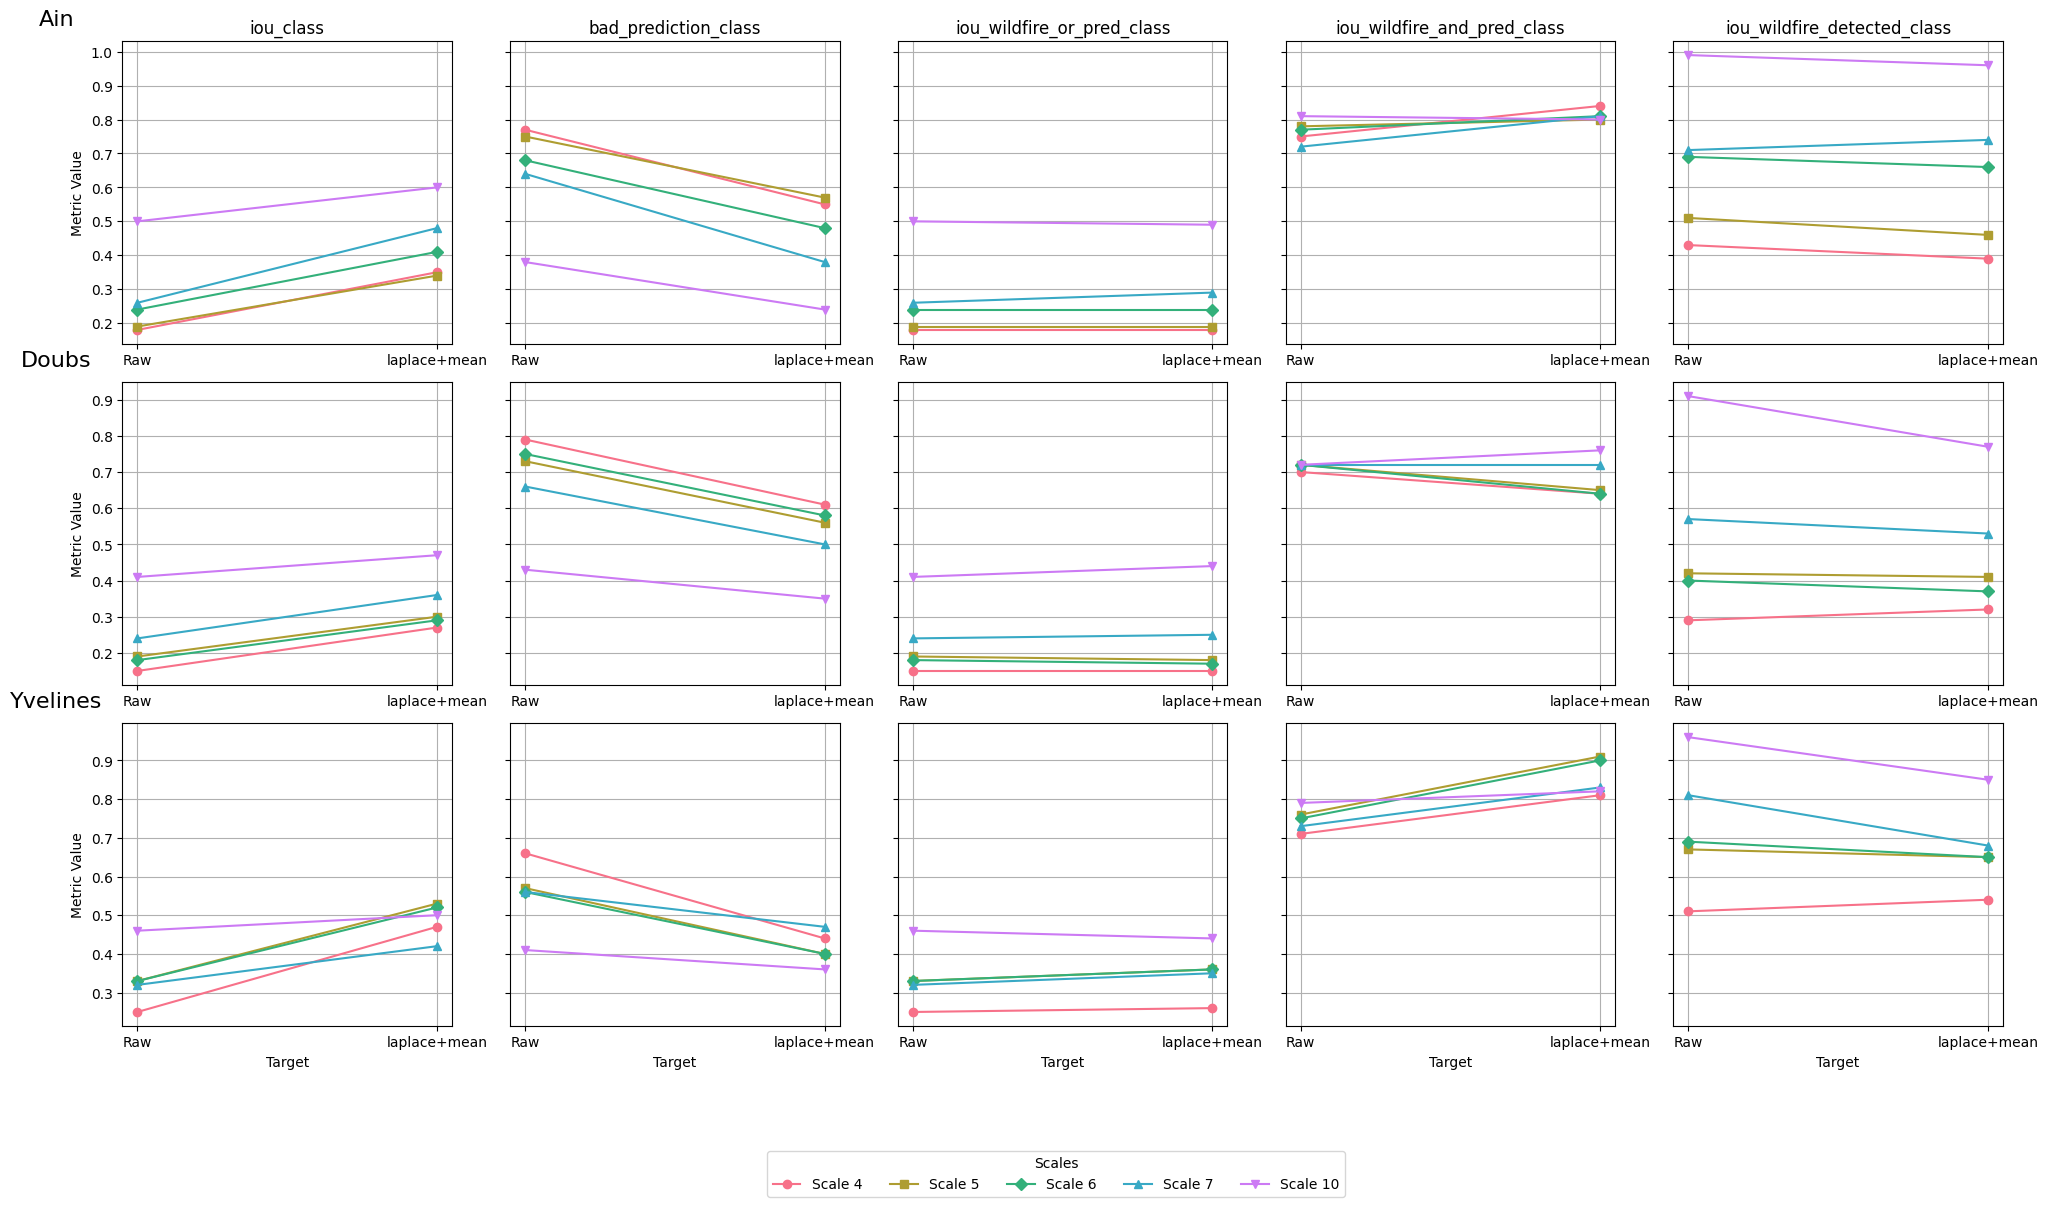

In [1686]:
# Define markers for each department
dept_markers = {
    4: 'o',   # Circle
    5: 's',   # Square
    6: 'D',   # Diamond
    7: '^',   # Triangle up
    10: 'v',  # Triangle down
}


metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class']
df_1.replace({'nbsinister-kmeans-5-Class-Dept': 'Raw'}, inplace=True)
df_1.replace({'nbsinister-kmeans-5-Class-Dept-laplace+mean-Specialized': 'laplace+mean'}, inplace=True)

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

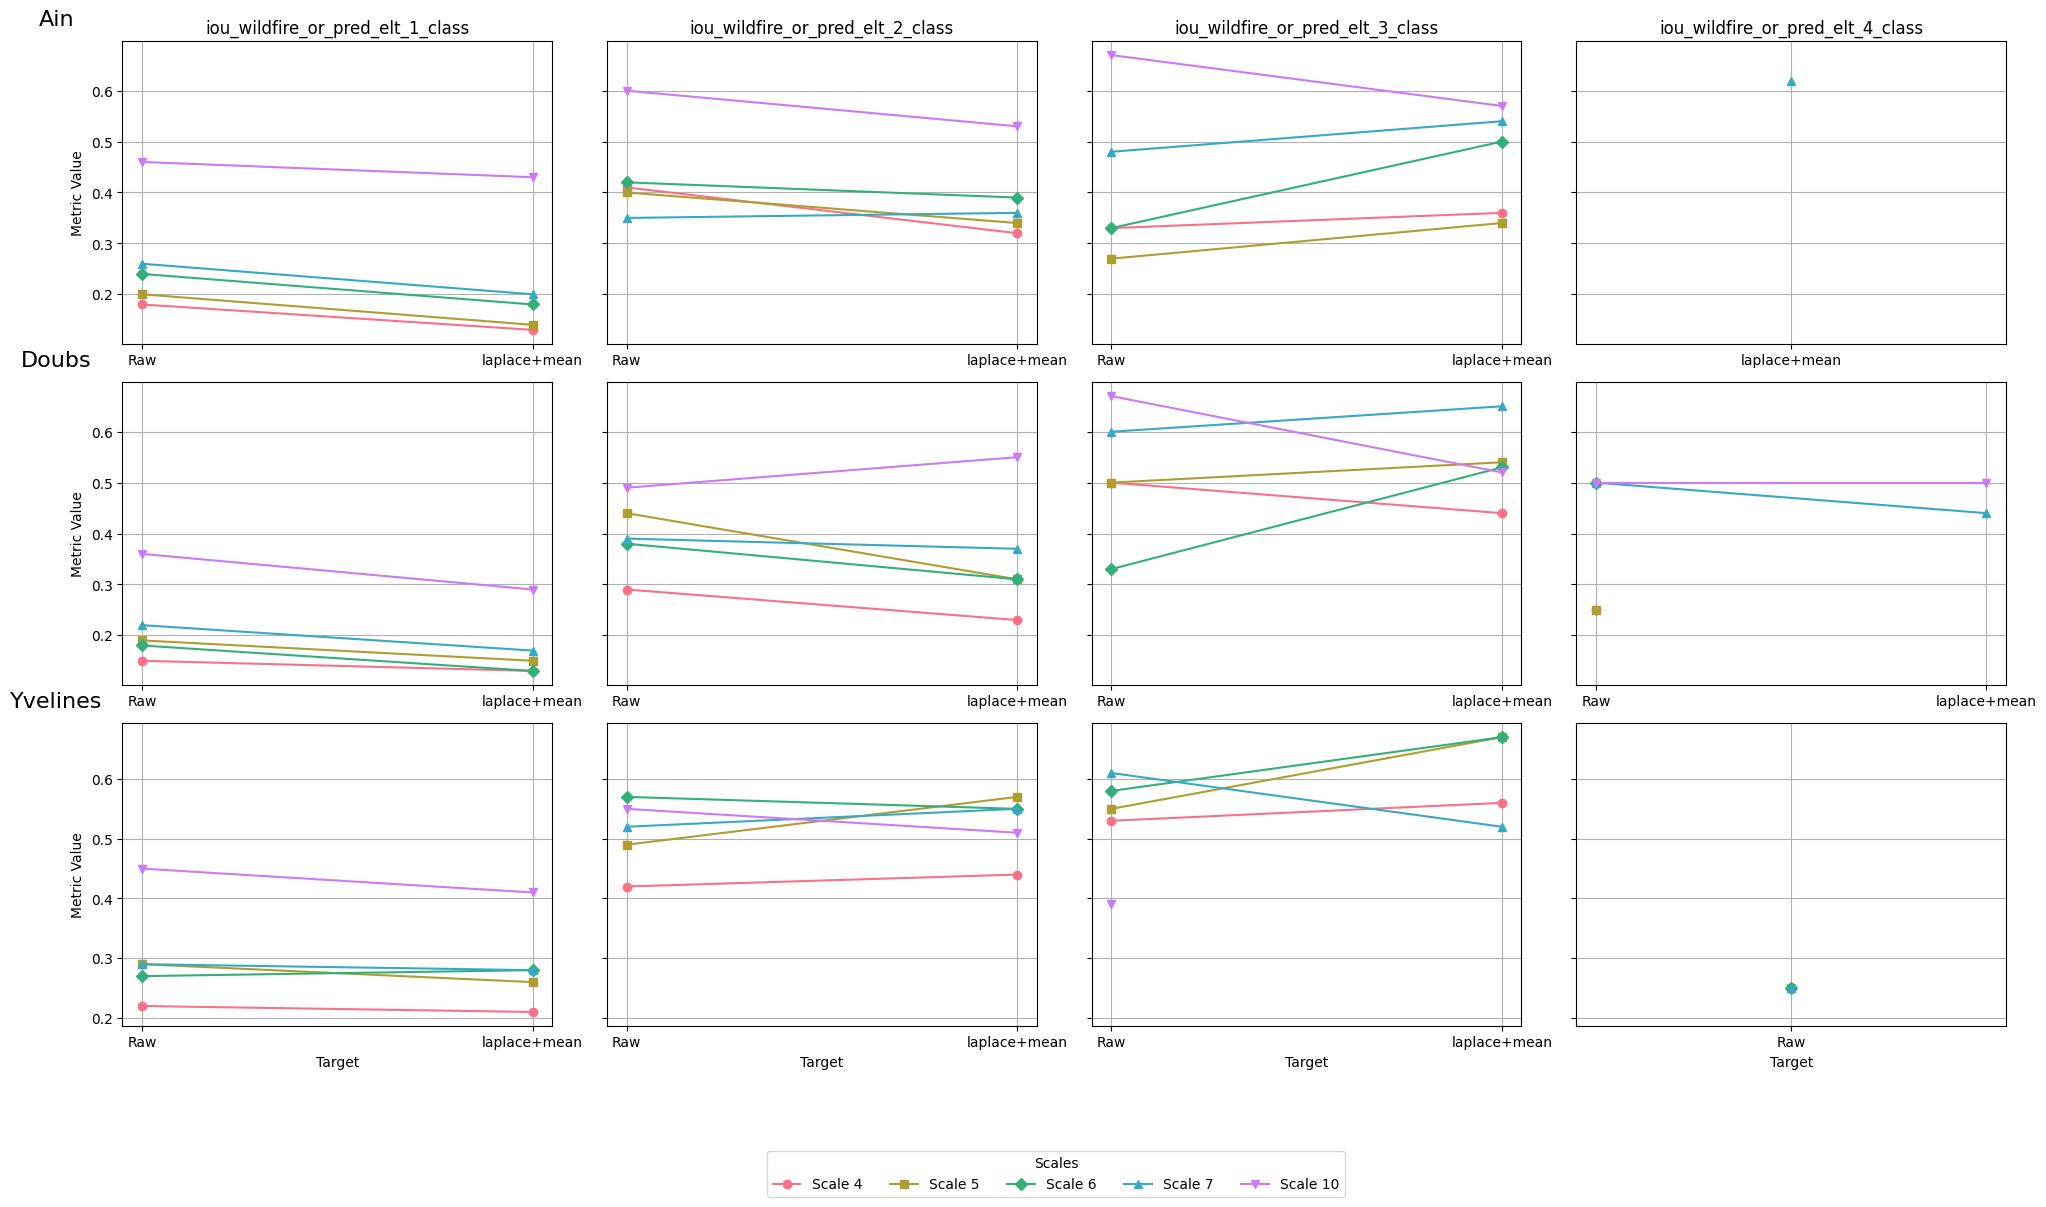

In [1687]:
metrics =  ['iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class', 'iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')

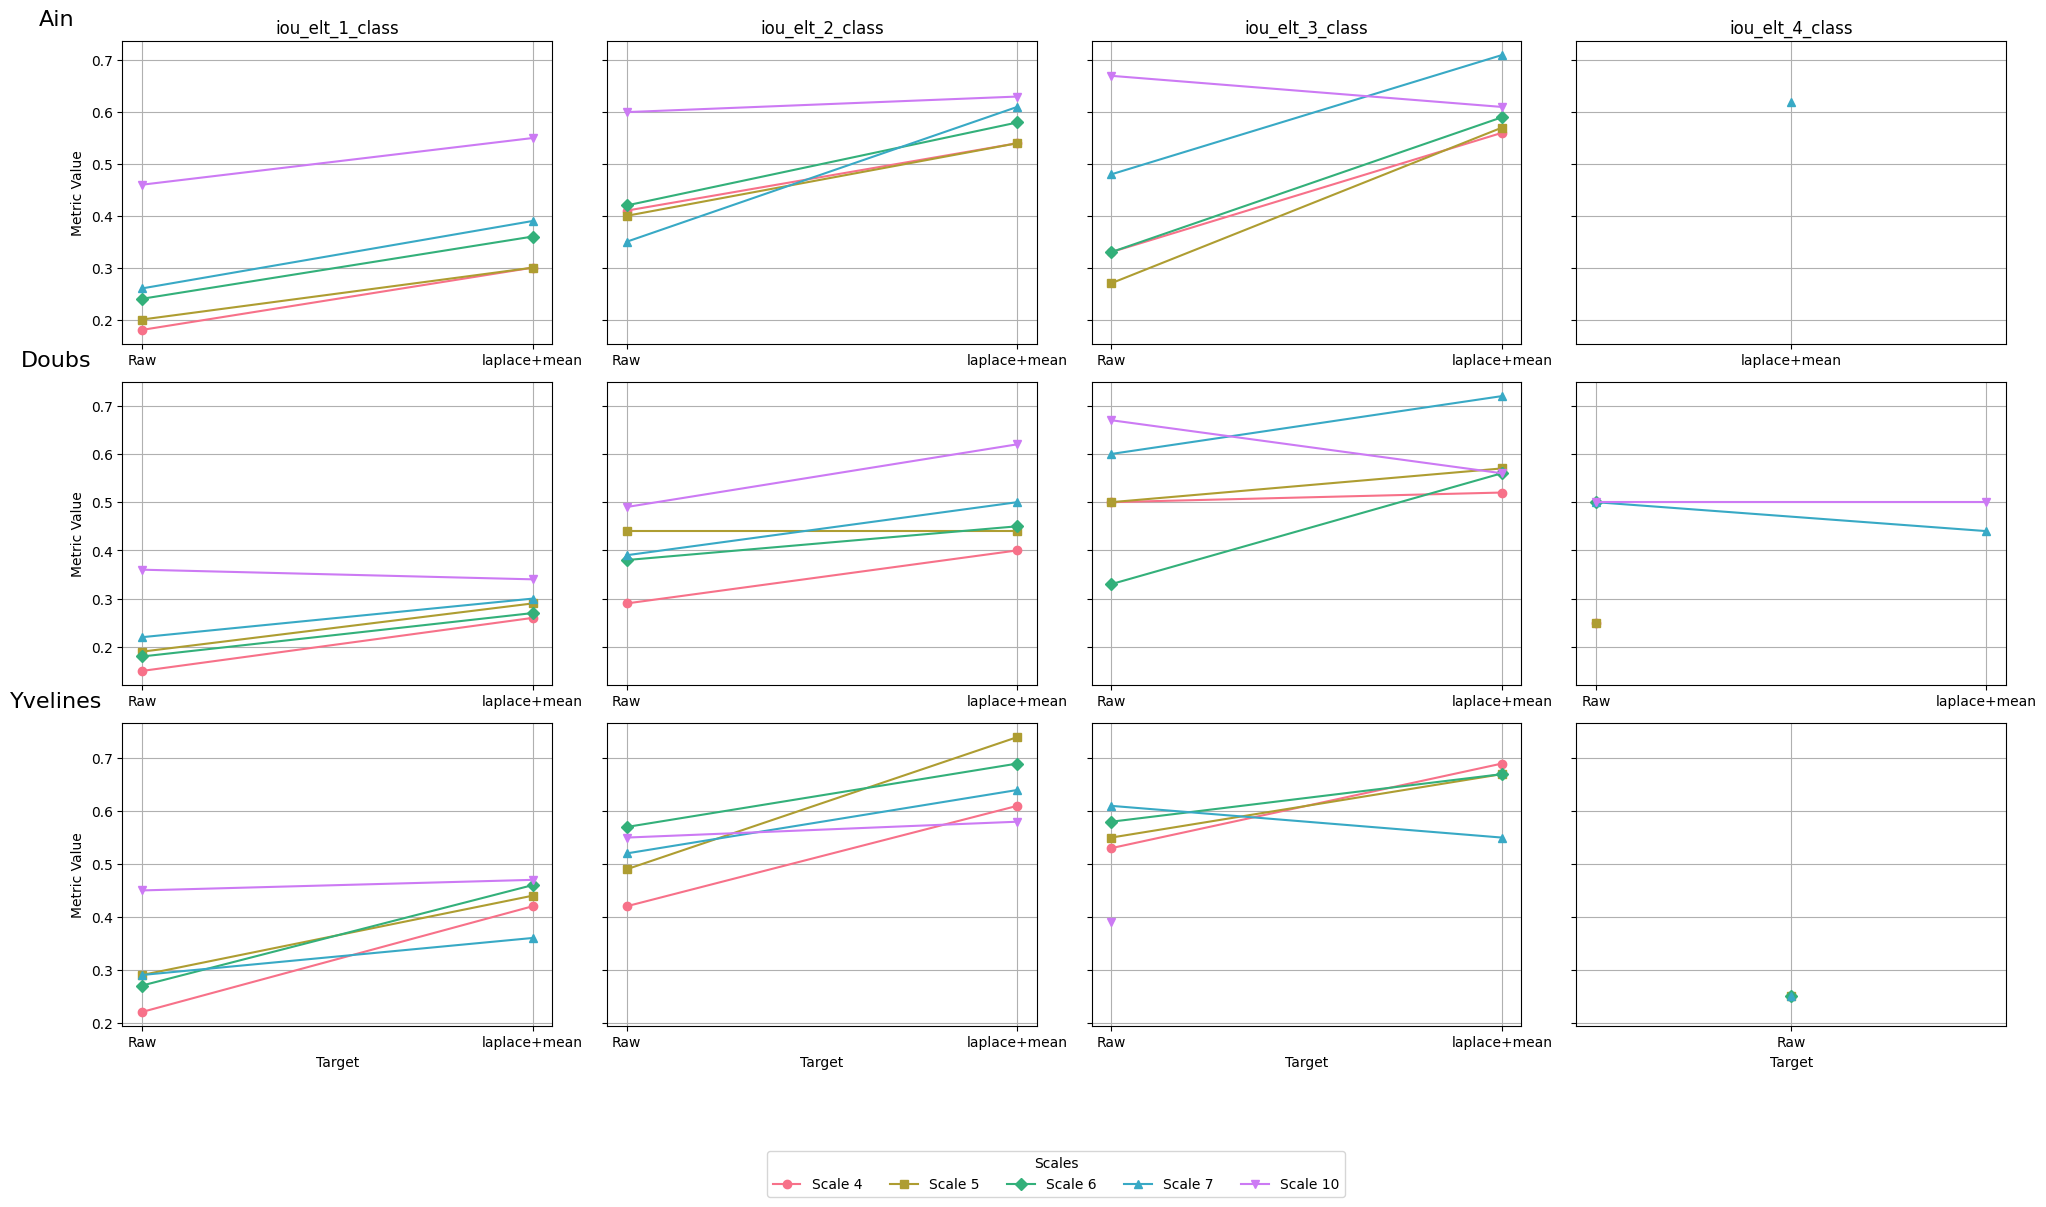

In [1688]:
metrics =  ['iou_elt_1_class', 'iou_elt_2_class', 'iou_elt_3_class', 'iou_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Target', 'Scale', Path('./'), '1')

ValueError: number sections must be larger than 0.

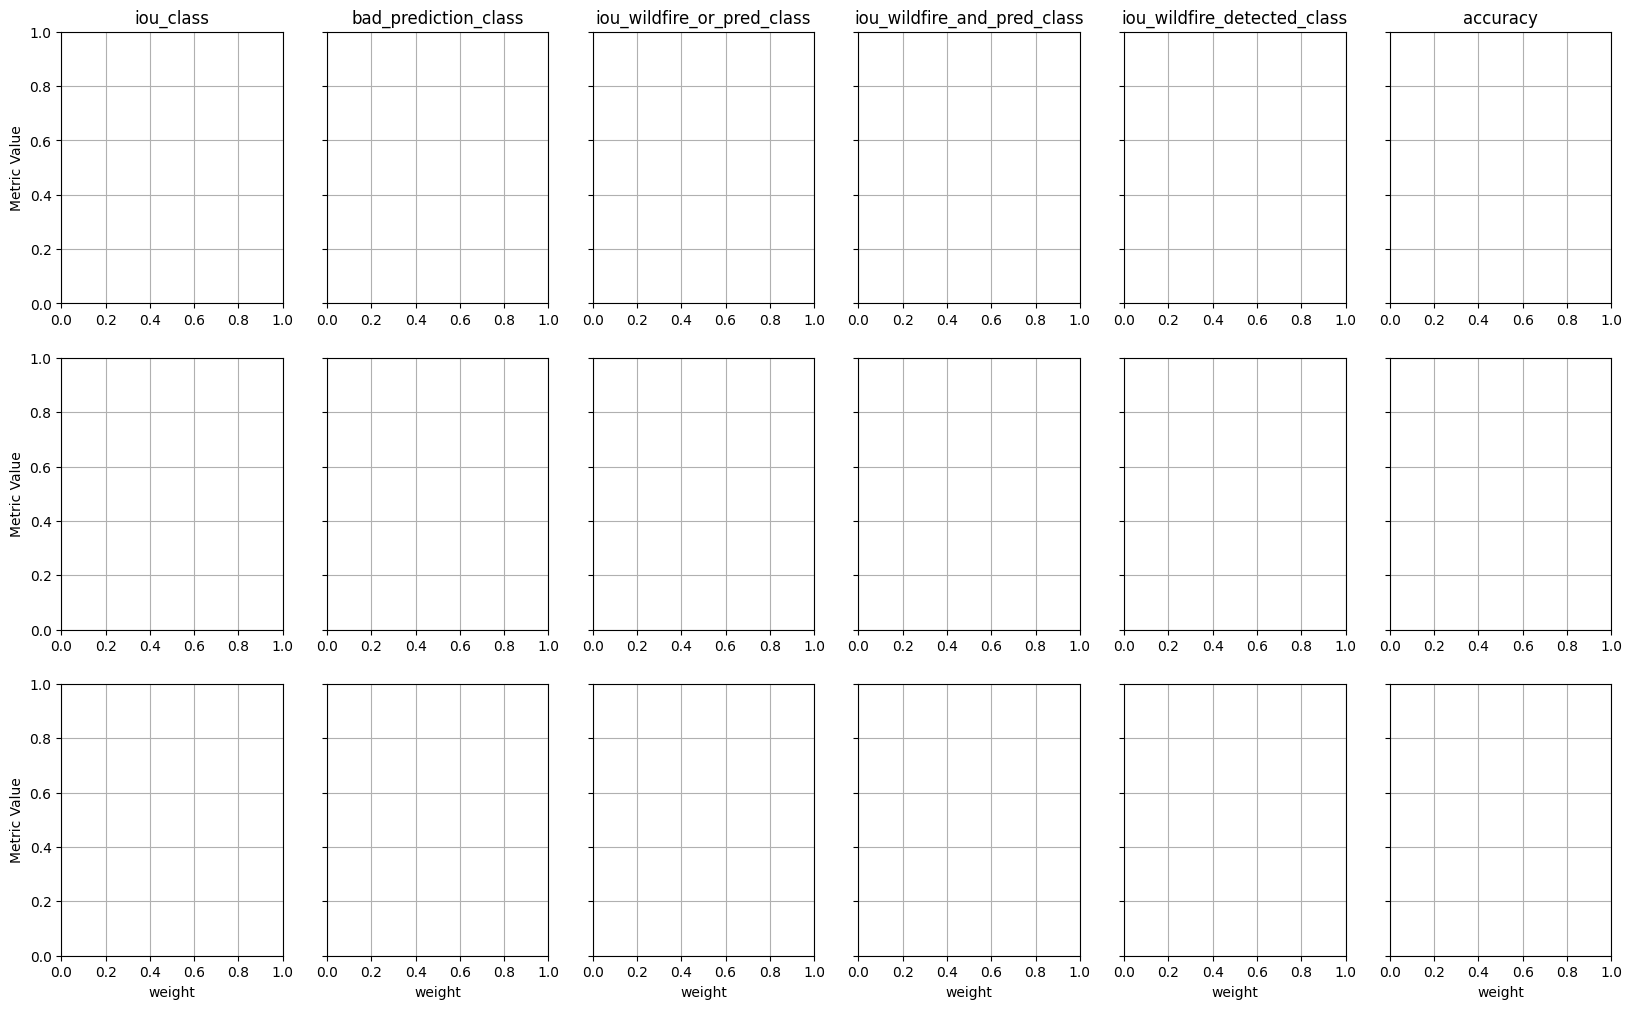

In [1689]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'accuracy']

compare_models3(df_1, departement_list, dept_markers, metrics, 'weight', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

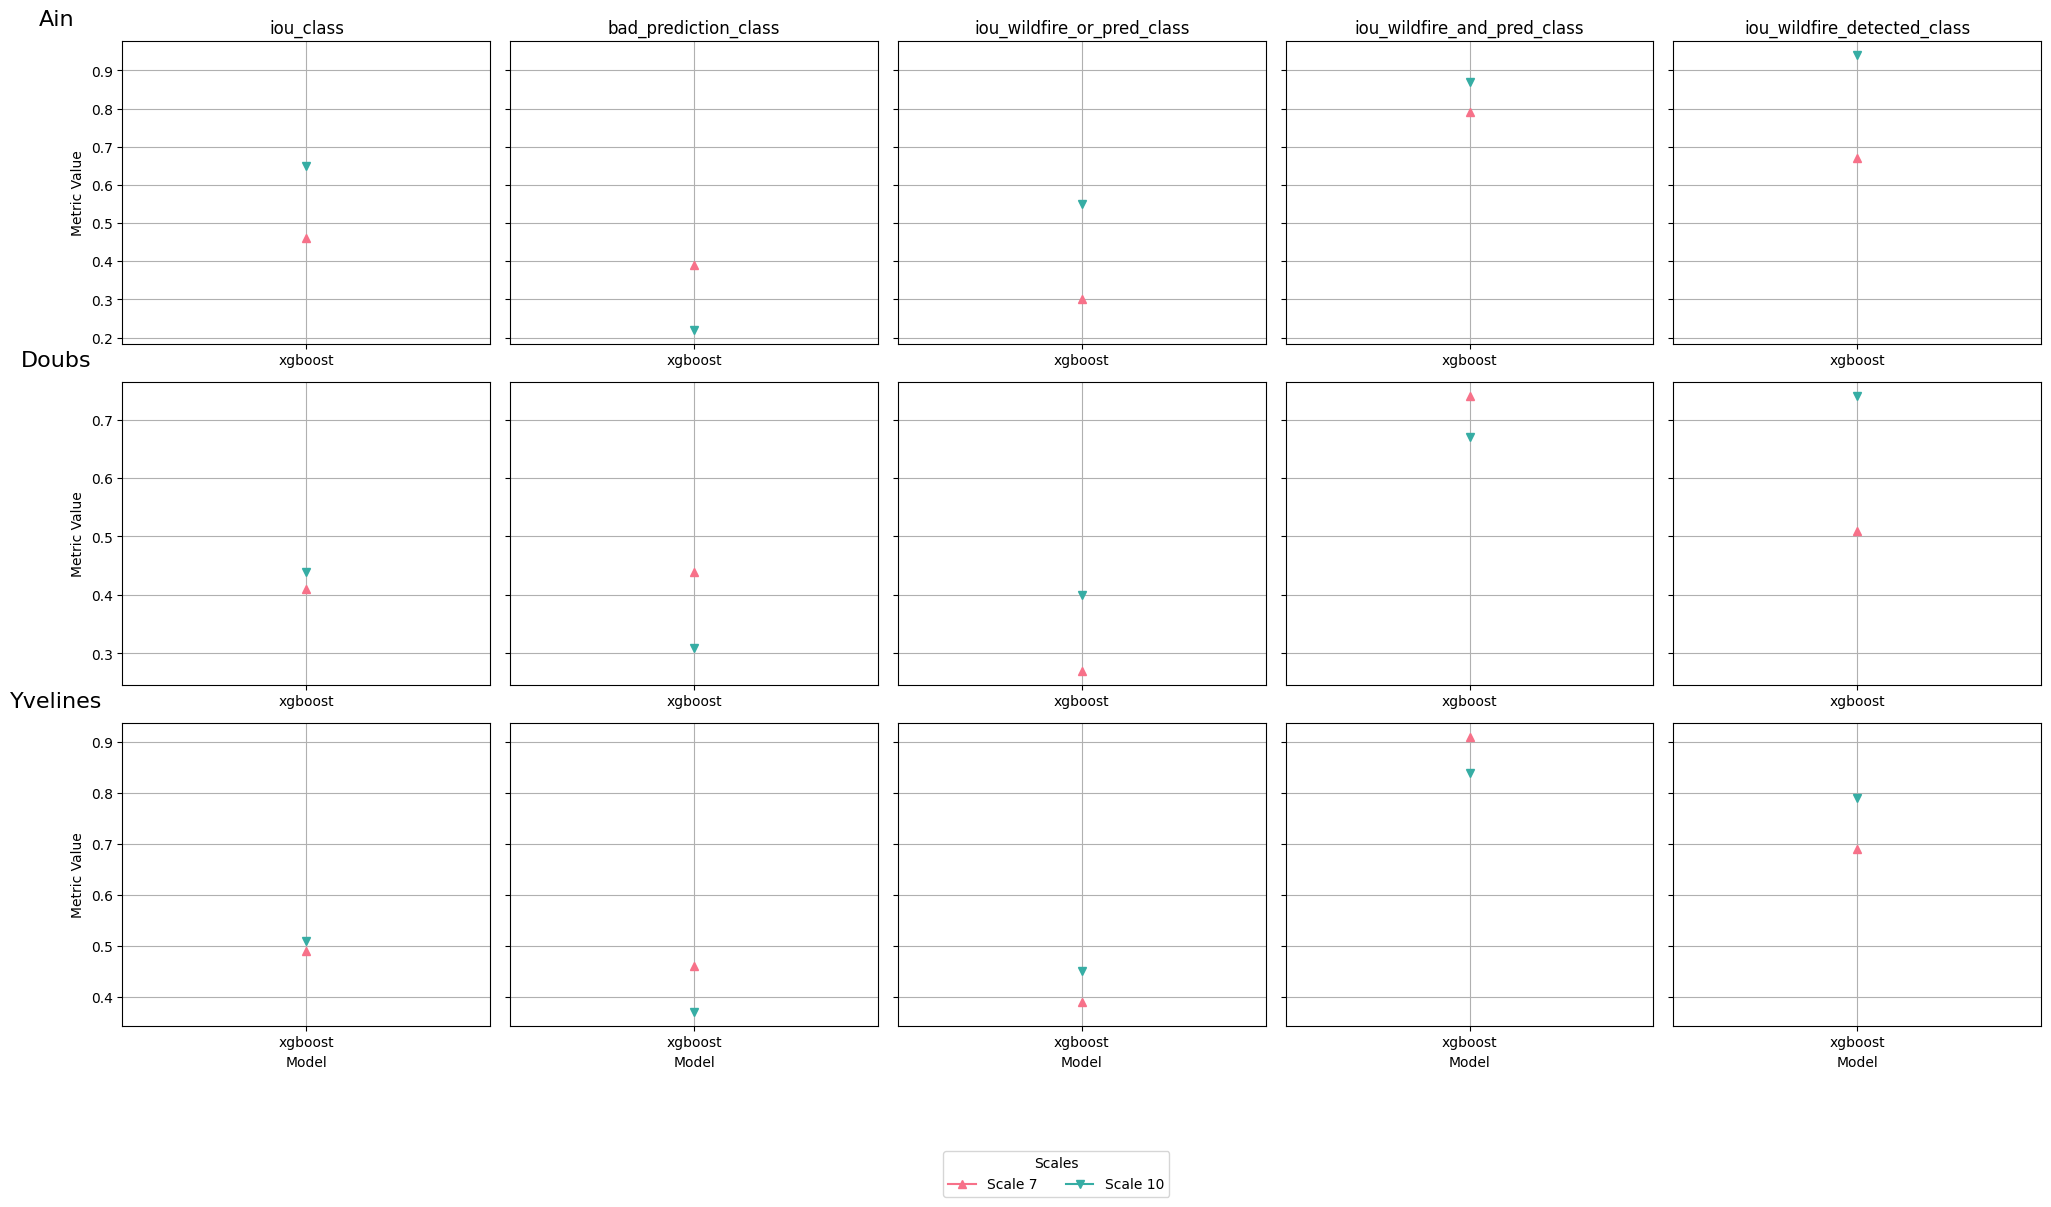

In [64]:
df_1 = df[(df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Model', 'Scale', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, '7', 'kmeans_thresh', Path('./'), '1')
#compare_models2(df, departement_list, dept_markers, metrics, 'Departement', 'kmeans_thresh', Path('./'), '1')

In [65]:
results = {}

for department in df['Department'].unique():
    results[department] = {
        'mean_metrique_by_target': {},
        'max_metrique_by_target': {}
    }
    for target in df[df['Department'] == department].Model.unique():
        mean_value = round(df[(df['Department'] == department) & (df['Model'] == target)]['iou_class'].mean(), 2)
        #max_value = round(df[(df['Department'] == department) & (df['Target'] == target)]['iou_wildfire_graph_0_season_high_class'].max(), 2)

        results[department]['mean_metrique_by_target'][target] = mean_value
        #results[department]['max_metrique_by_target'][target] = max_value

results


{'departement-01-ain': {'mean_metrique_by_target': {'xgboost': 0.38},
  'max_metrique_by_target': {}},
 'departement-25-doubs': {'mean_metrique_by_target': {'xgboost': 0.31},
  'max_metrique_by_target': {}},
 'departement-78-yvelines': {'mean_metrique_by_target': {'xgboost': 0.4},
  'max_metrique_by_target': {}}}

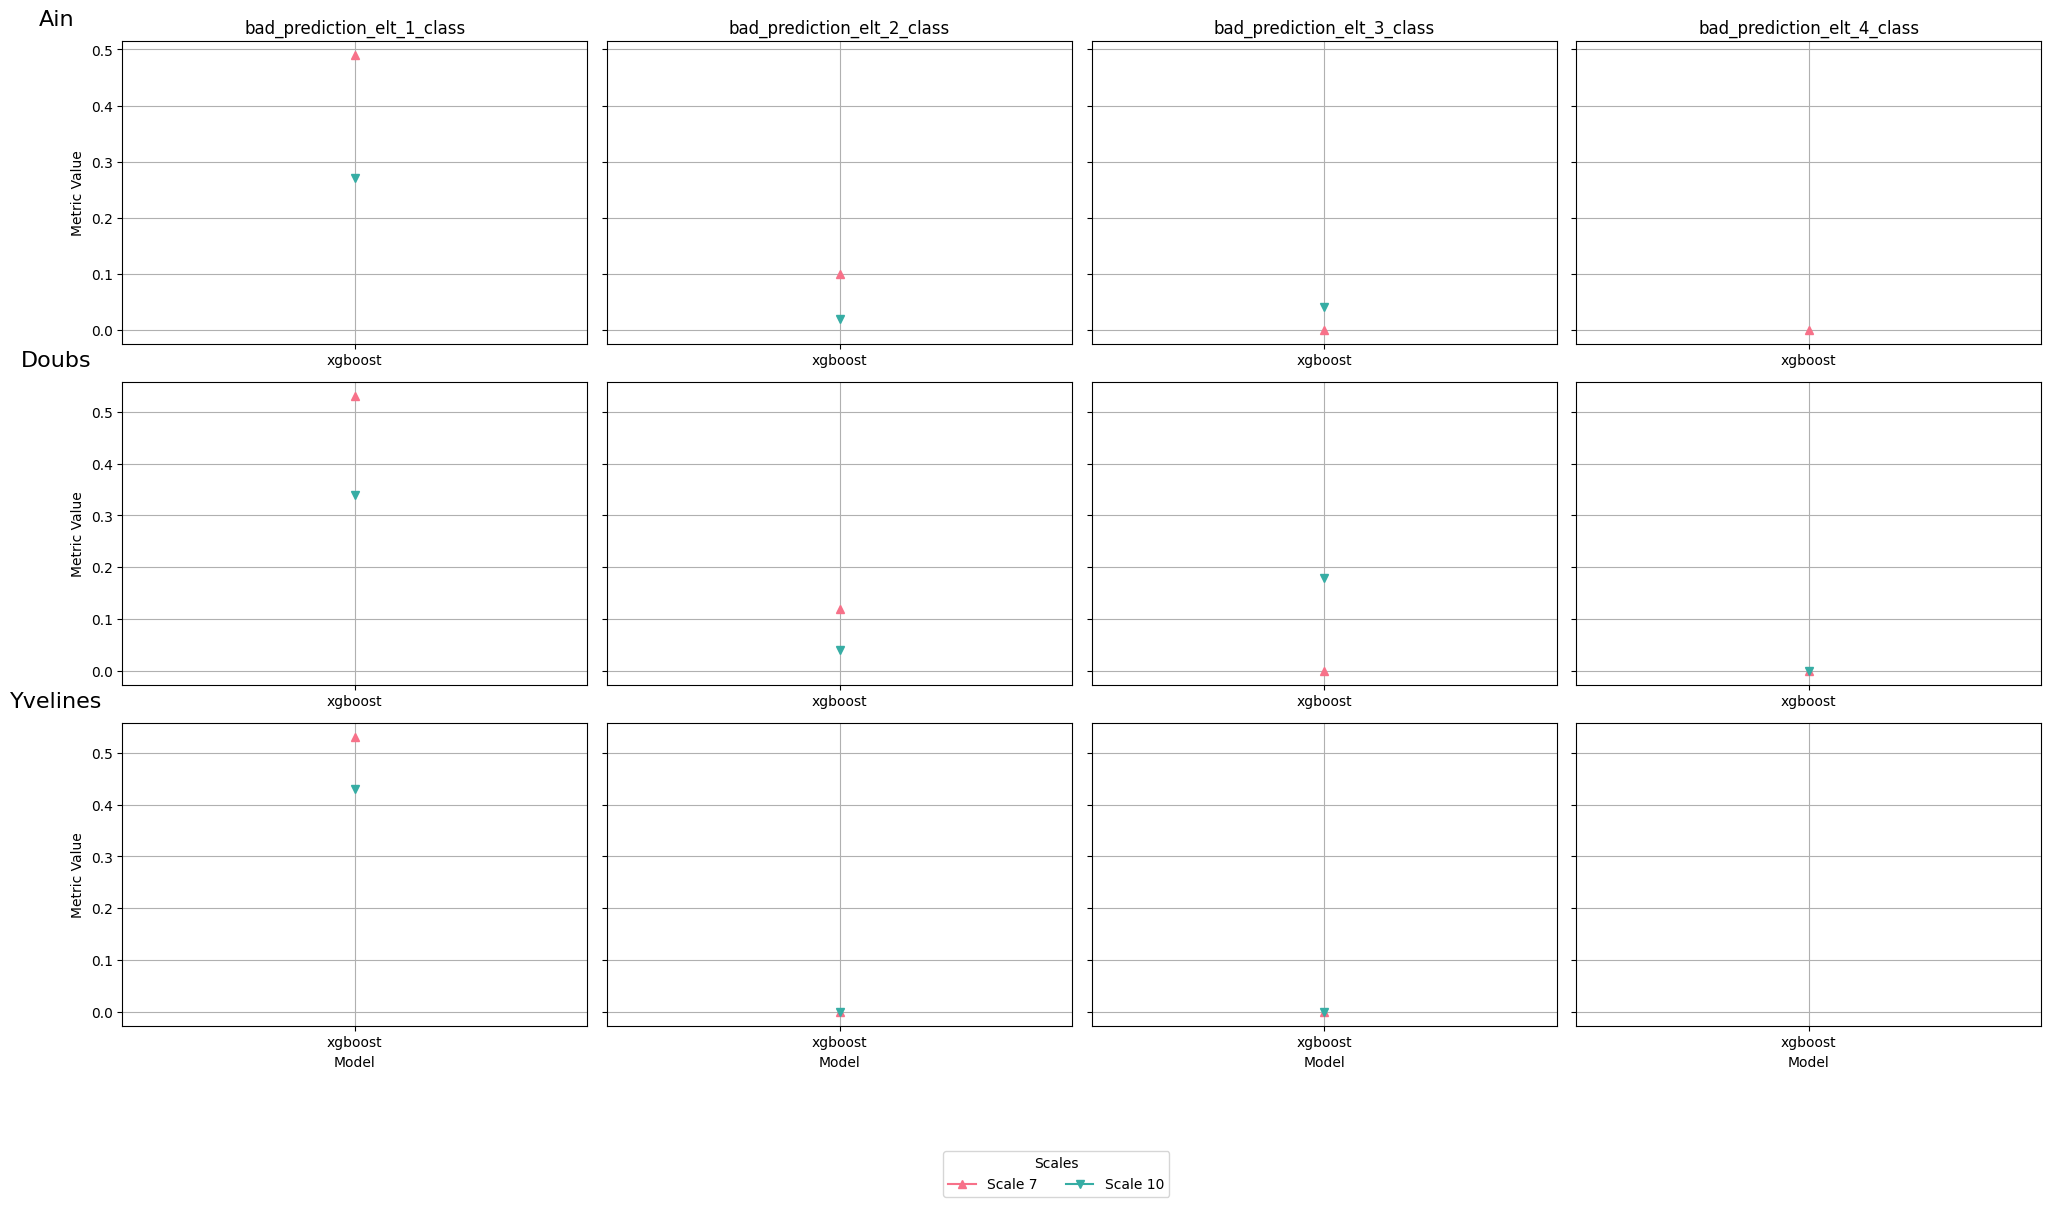

In [66]:
metrics =  ['bad_prediction_elt_1_class', 'bad_prediction_elt_2_class', 'bad_prediction_elt_3_class', 'bad_prediction_elt_4_class']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Model', 'Scale', Path('./'), '1')

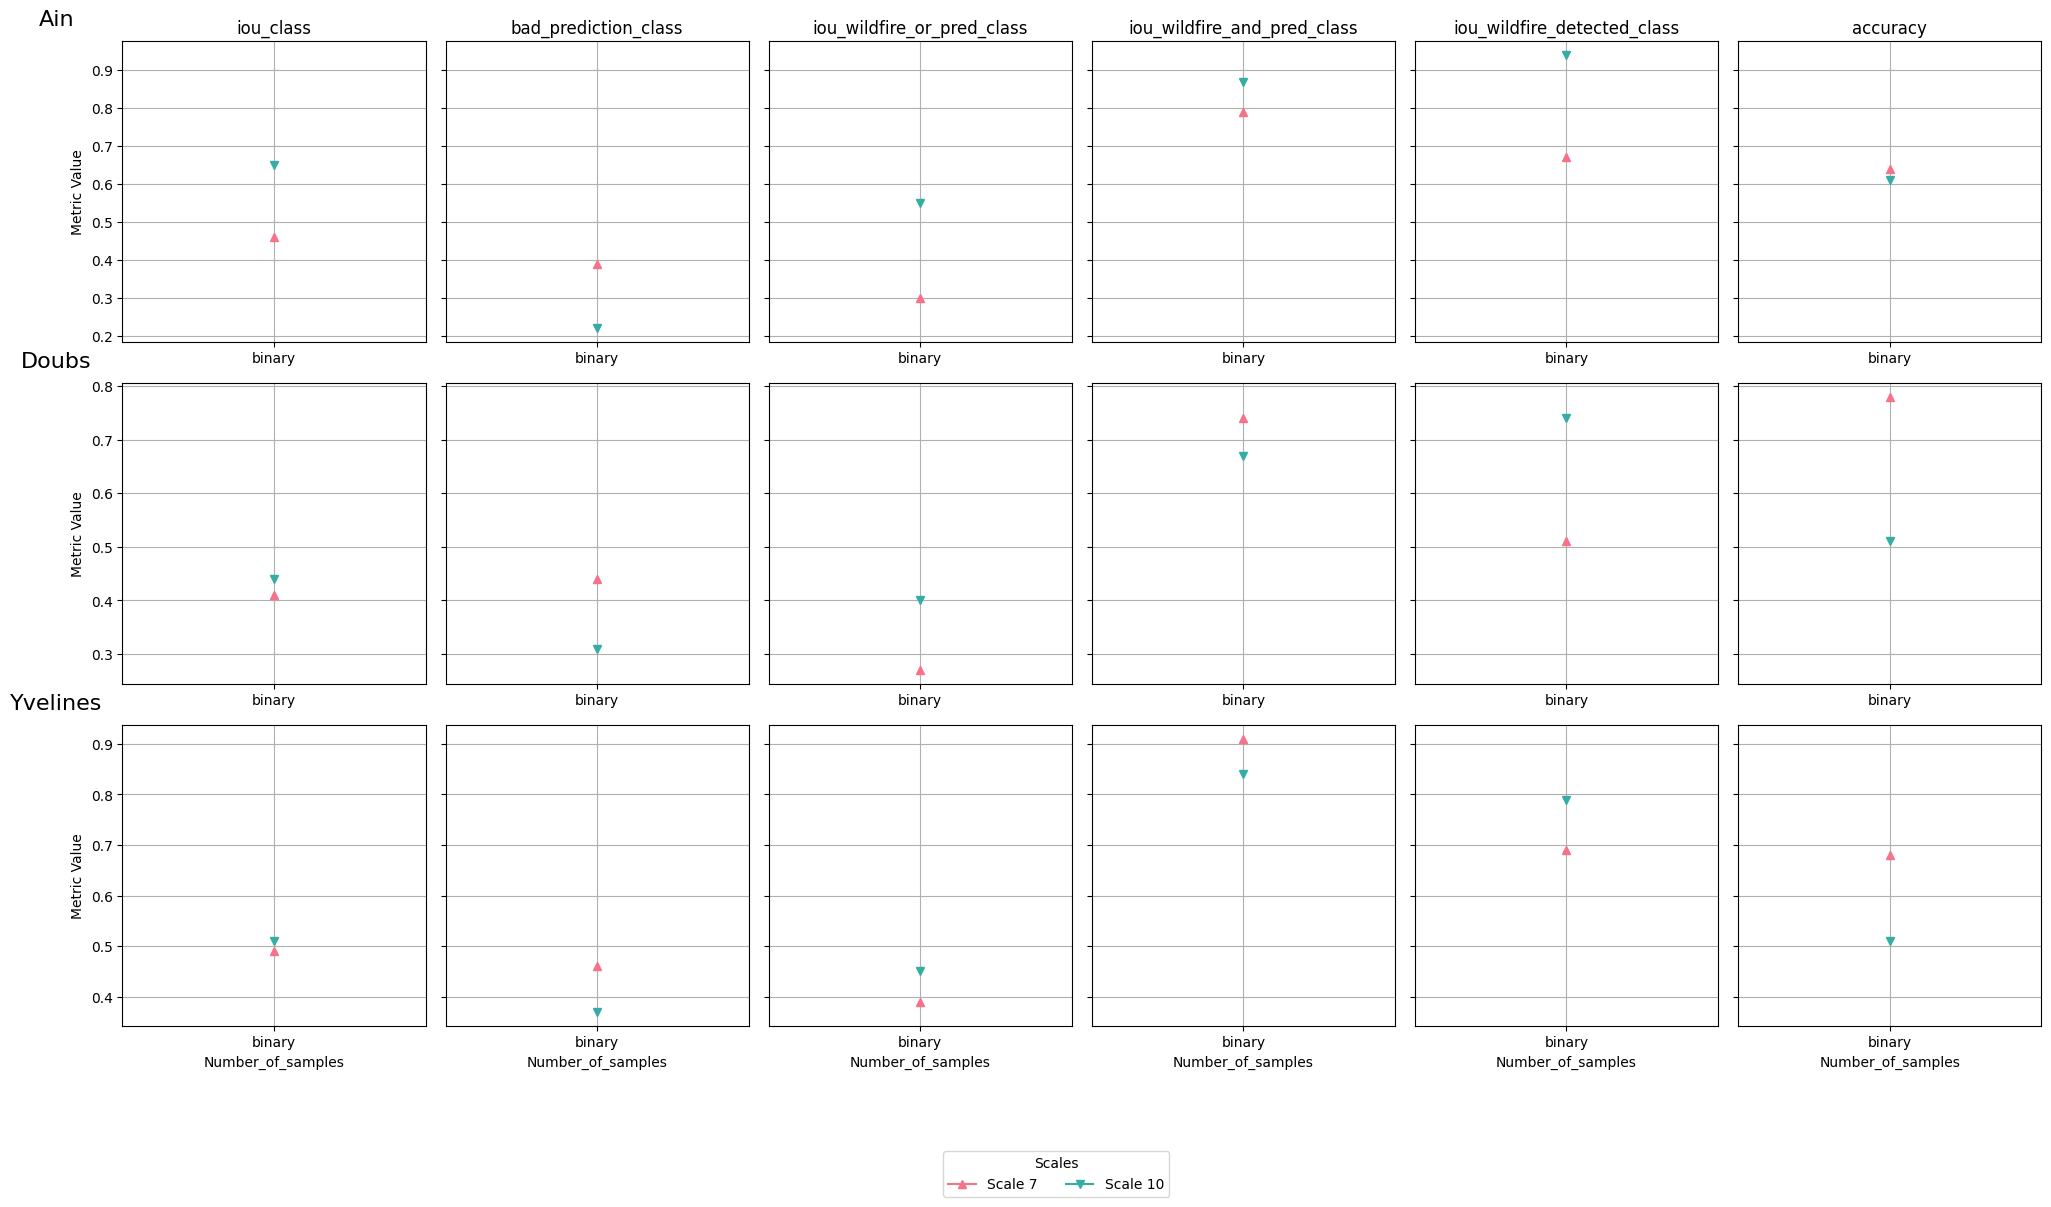

In [67]:
df_1 = df[(df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'accuracy']

compare_models3(df_1, departement_list, dept_markers, metrics, 'Number_of_samples', 'Scale', Path('./'), '1')

In [68]:
def transform_dataframe_graph(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}(\d+){id_suffix}$'  # Exemple : 'met_(\d+)_class'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    ids = [col.split('_')[1] for col in columns]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = int(col.split('_')[-2])  # Extrait le chiffre entre 'iou_' et '_class'
            print(col)
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

def transform_dataframe_season(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}(high|medium){id_suffix}$'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    ids = [col.split('_')[1] for col in columns]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = (col.split('_')[-2])  # Extrait le chiffre entre 'iou_' et '_class'
            
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

def transform_dataframe_graph_and_season(df, additional_columns, val_name, id_prefix, id_suffix='_class'):
    
    columns = list(df.columns)

    # Extraire les indices numériques à partir des colonnes (ex: 'met_0_class' -> '0')
    pattern = rf'^{id_prefix}graph_(\d+)_season_high{id_suffix}$'  # Exemple : 'met_(\d+)_class'
    columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
    transformed_data = []
    additional_columns = additional_columns or []

    # Parcourir chaque colonne qui correspond au pattern et extraire les informations
    for col in df.columns:
        # Si la colonne correspond au motif 'iou_<index>_class'
        if pd.Series(col).str.contains(pattern).any():
            # Extraire l'indice du 'graph' (le chiffre au milieu)
            graph_value = f"{col.split('_')[-4]}_{col.split('_')[-2]}"
            
            # Ajouter la colonne 'iou' pour cette colonne dans le DataFrame
            for additional_col in additional_columns:
                df[additional_col] = df[additional_col]  # Conserver les autres colonnes inchangées
            # Ajouter les données transformées
            for idx in range(len(df)):
                transformed_data.append({
                    'ID': graph_value,
                    val_name: df[col].iloc[idx],
                    **{additional_col: df[additional_col].iloc[idx] for additional_col in additional_columns}
                })
    
    # Convertir les données transformées en DataFrame
    df_transformed = pd.DataFrame(transformed_data).sort_values(by='ID').reset_index(drop=True)

    return df_transformed

/tmp/ipykernel_6965/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_6965/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_0_class
iou_1_class
iou_2_class
iou_3_class
iou_4_class
iou_5_class
iou_6_class
iou_7_class
iou_8_class
iou_9_class
iou_10_class
iou_wildfire_detected_0_class
iou_wildfire_detected_1_class
iou_wildfire_detected_2_class
iou_wildfire_detected_3_class
iou_wildfire_detected_4_class
iou_wildfire_detected_5_class
iou_wildfire_detected_6_class
iou_wildfire_detected_7_class
iou_wildfire_detected_8_class
iou_wildfire_detected_9_class
iou_wildfire_detected_10_class
bad_prediction_local_0_class
bad_prediction_local_1_class
bad_prediction_local_2_class
bad_prediction_local_3_class
bad_prediction_local_4_class
bad_prediction_local_5_class
bad_prediction_local_6_class
bad_prediction_local_7_class
bad_prediction_local_8_class
bad_prediction_local_9_class
bad_prediction_local_10_class
iou_wildfire_or_pred_0_class
iou_wildfire_or_pred_1_class
iou_wildfire_or_pred_2_class
iou_wildfire_or_pred_3_class
iou_wildfire_or_pred_4_class
iou_wildfire_or_pred_5_class
iou_wildfire_or_pred_6_class
iou_wildfire_

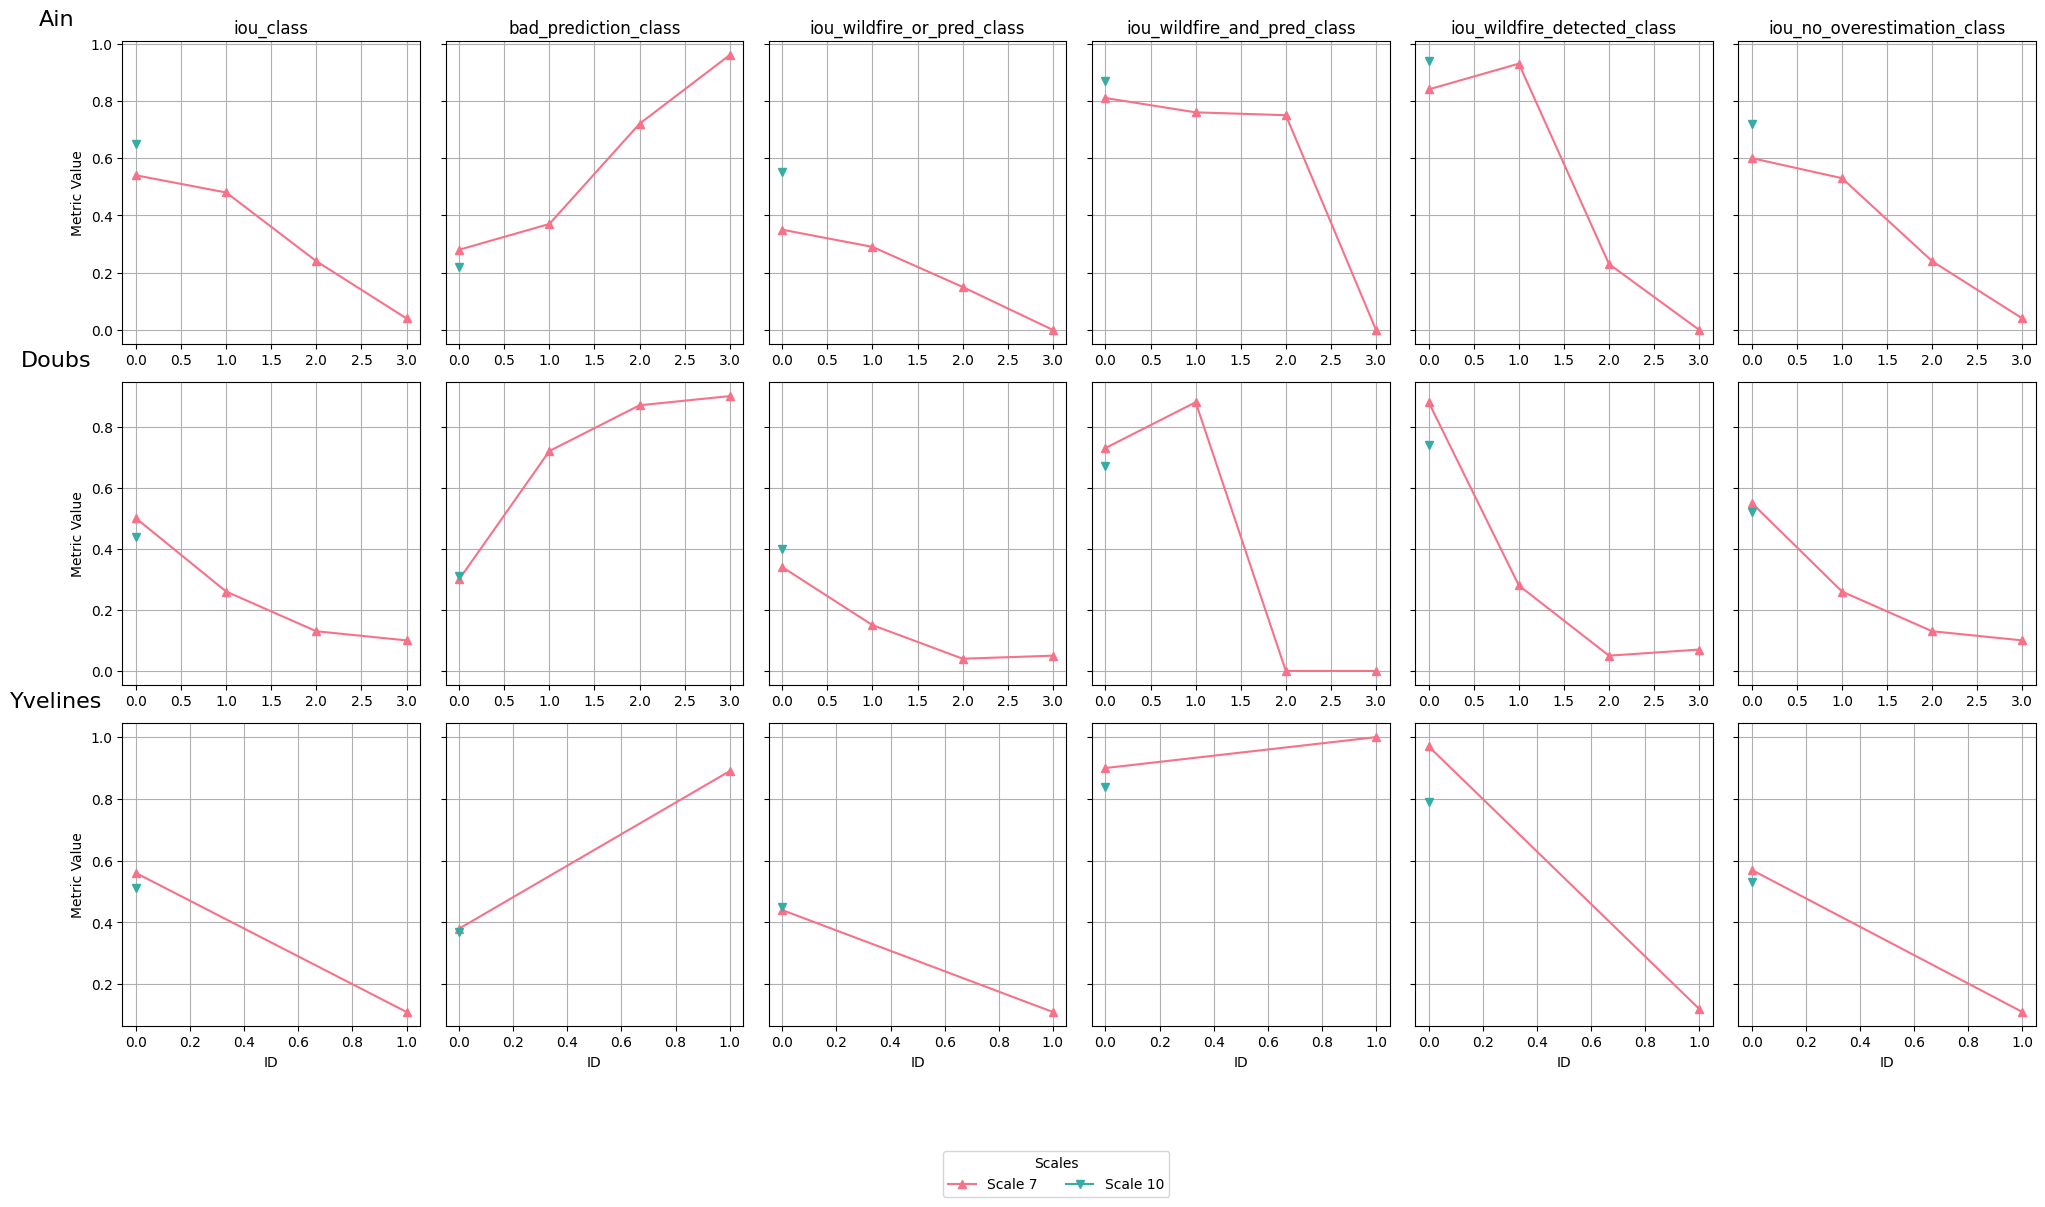

In [69]:
columns = [
    'Department',
    'Model',
    'Target',
    'Task_type',
    'Loss_function',
    'Number_of_samples',
    'kdays',
    'Number_of_features',
    'Scale',
    'Base',
    'Method',
    'Days_in_futur',
    'weight',
    'kmeans_thresh',
    'kmeans_shift'
]

df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one') & (df['Model'] == 'xgboost')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

/tmp/ipykernel_6965/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_6965/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_elt_1_class
iou_elt_2_class
iou_elt_3_class
iou_elt_4_class
iou_wildfire_detected_elt_1_class
iou_wildfire_detected_elt_2_class
iou_wildfire_detected_elt_3_class
iou_wildfire_detected_elt_4_class
bad_prediction_elt_1_class
bad_prediction_elt_2_class
bad_prediction_elt_3_class
bad_prediction_elt_4_class
iou_wildfire_or_pred_elt_1_class
iou_wildfire_or_pred_elt_2_class
iou_wildfire_or_pred_elt_3_class
iou_wildfire_or_pred_elt_4_class
iou_wildfire_and_pred_elt_1_class
iou_wildfire_and_pred_elt_2_class
iou_wildfire_and_pred_elt_3_class
iou_wildfire_and_pred_elt_4_class
iou_no_overestimation_elt_1_class
iou_no_overestimation_elt_2_class
iou_no_overestimation_elt_3_class
iou_no_overestimation_elt_4_class


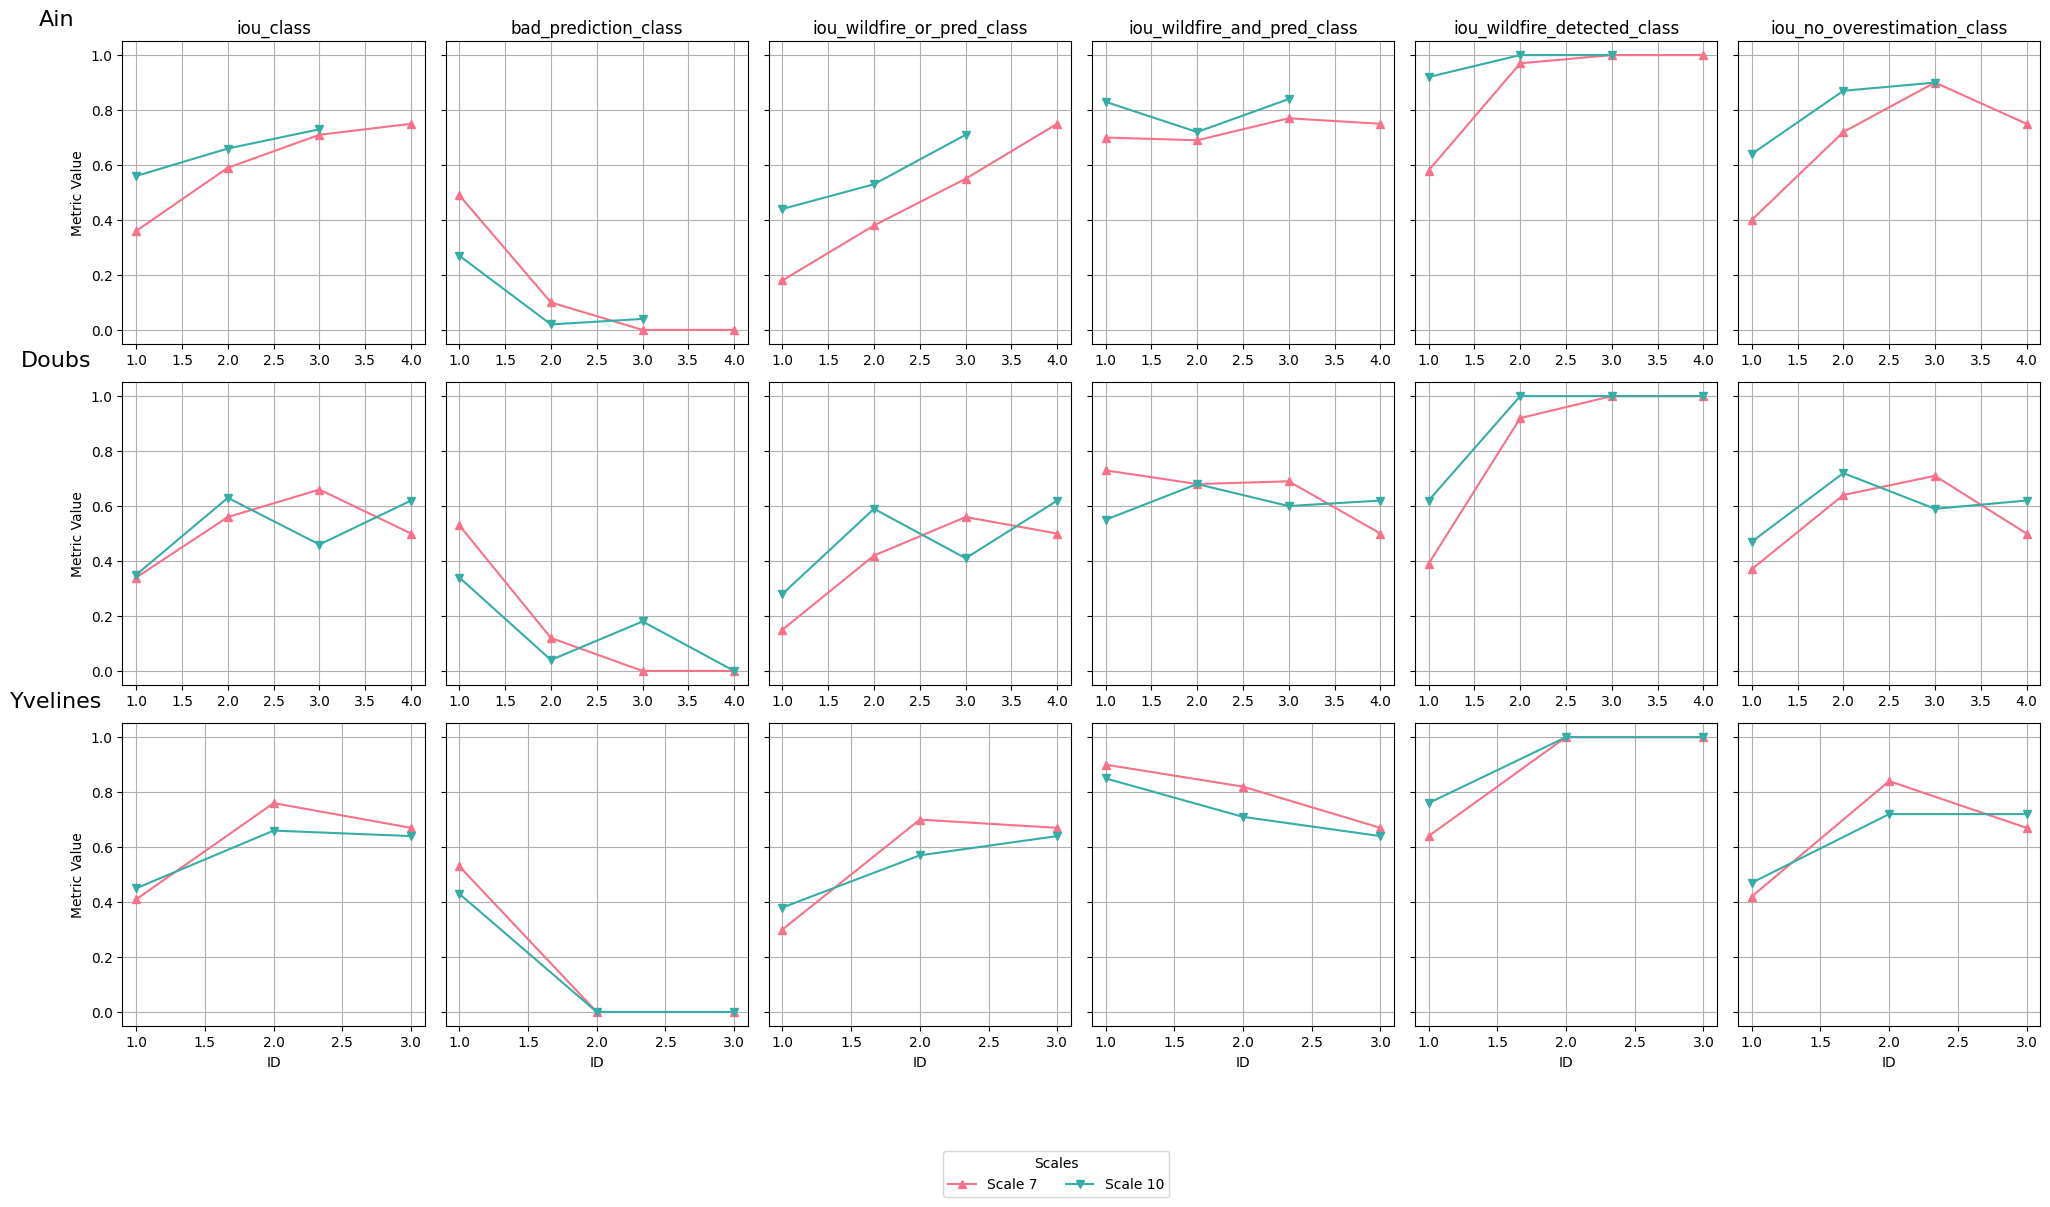

In [70]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [71]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'Dual-xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

/tmp/ipykernel_6965/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_6965/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_elt_1_class
iou_elt_2_class
iou_elt_3_class
iou_elt_4_class


KeyError: 'ID'

In [166]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-max-0-kmeans-5-Class-Dept') & (df['weight'] == 'class')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

/tmp/ipykernel_596693/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_596693/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_0_class
iou_1_class
iou_2_class
iou_3_class
iou_4_class
iou_5_class
iou_6_class
iou_7_class
iou_8_class
iou_9_class
iou_10_class


KeyError: 'ID'

/tmp/ipykernel_596693/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_596693/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_elt_1_class
iou_elt_2_class
iou_elt_3_class
iou_elt_4_class
iou_wildfire_detected_elt_1_class
iou_wildfire_detected_elt_2_class
iou_wildfire_detected_elt_3_class
iou_wildfire_detected_elt_4_class
bad_prediction_elt_1_class
bad_prediction_elt_2_class
bad_prediction_elt_3_class
bad_prediction_elt_4_class
iou_wildfire_or_pred_elt_1_class
iou_wildfire_or_pred_elt_2_class
iou_wildfire_or_pred_elt_3_class
iou_wildfire_or_pred_elt_4_class
iou_wildfire_and_pred_elt_1_class
iou_wildfire_and_pred_elt_2_class
iou_wildfire_and_pred_elt_3_class
iou_wildfire_and_pred_elt_4_class
iou_no_overestimation_elt_1_class
iou_no_overestimation_elt_2_class
iou_no_overestimation_elt_3_class
iou_no_overestimation_elt_4_class


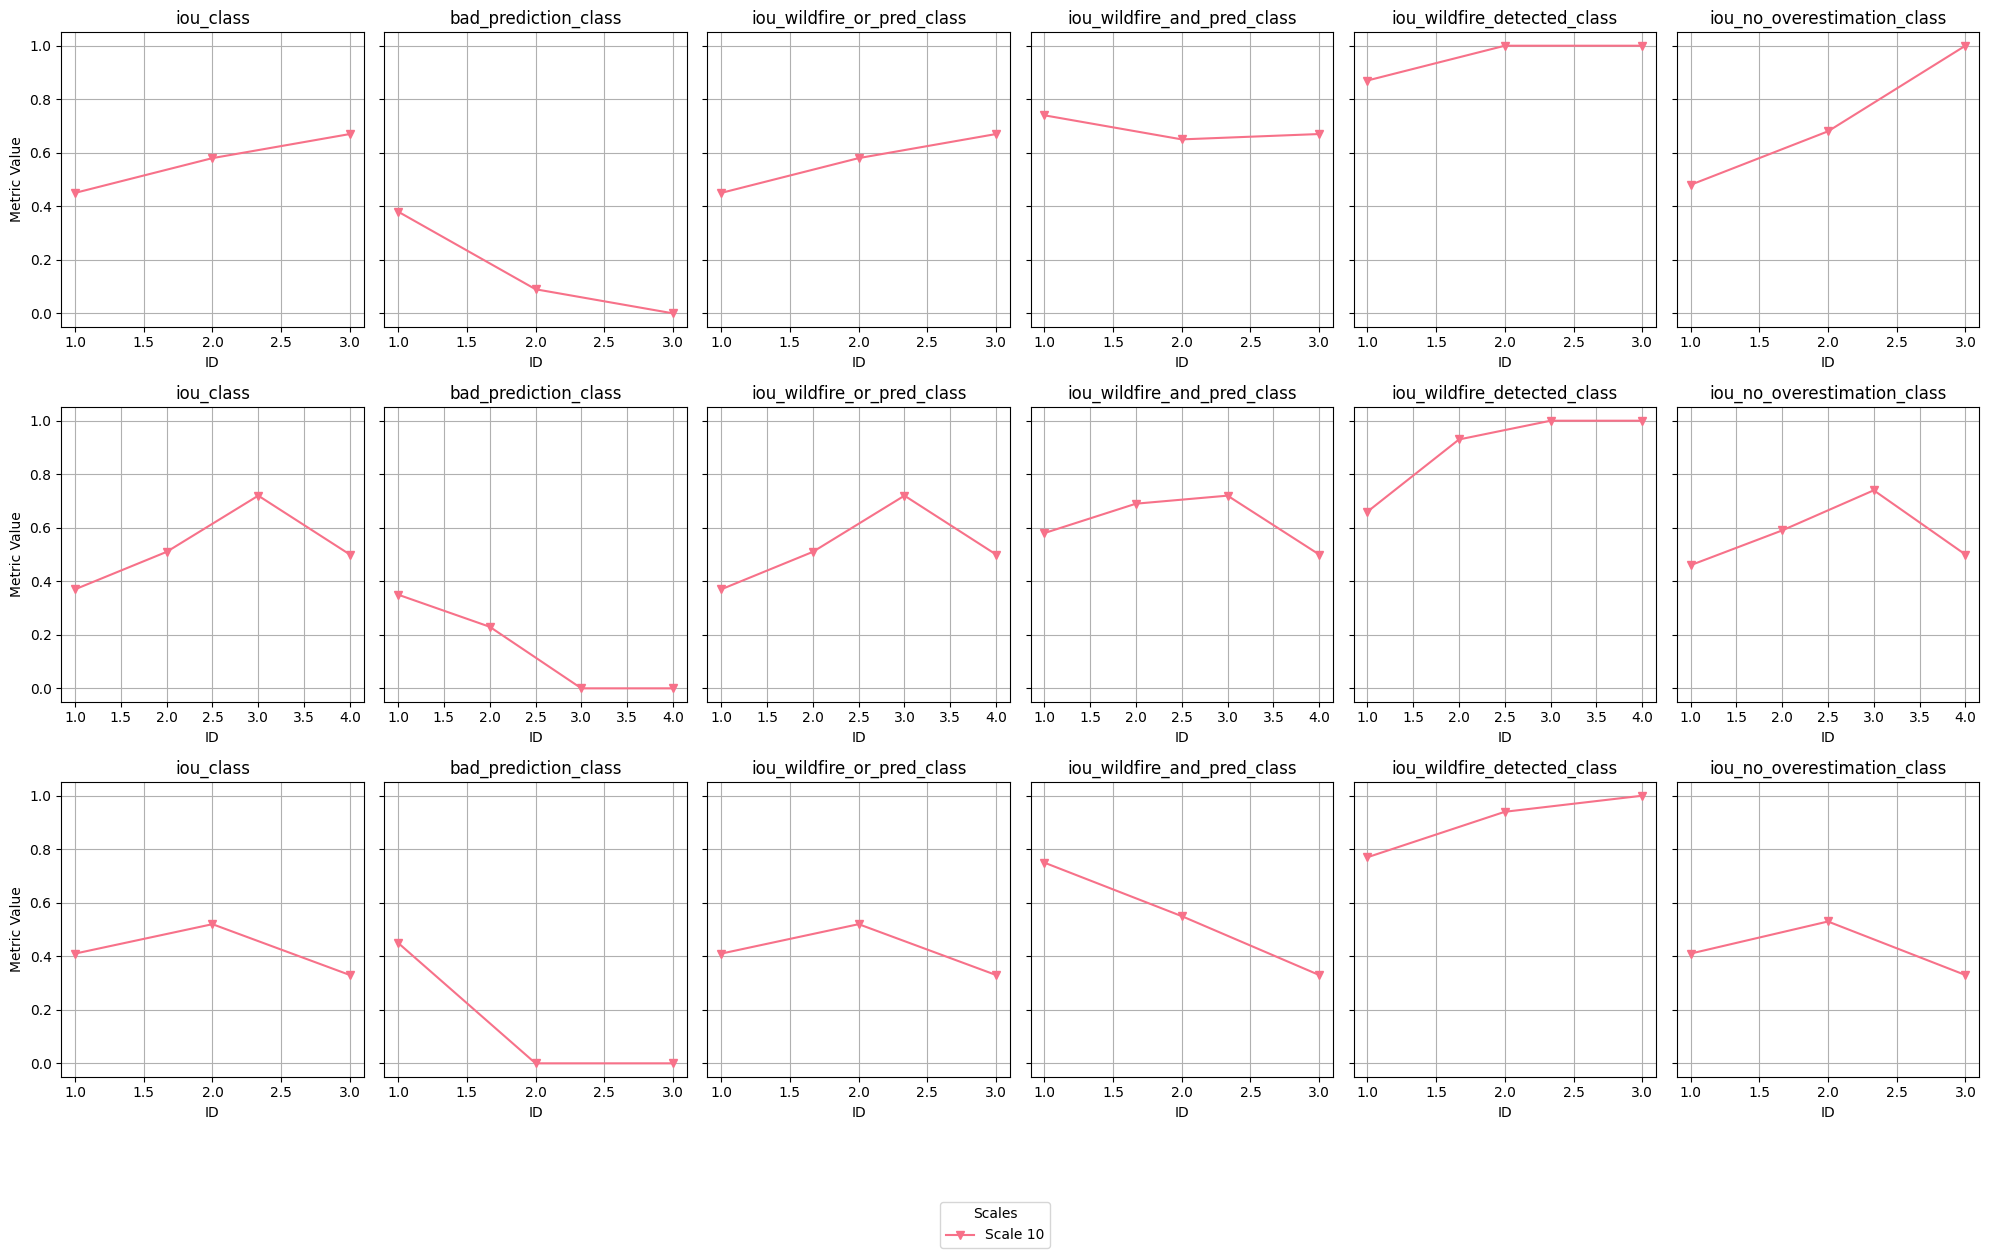

In [101]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-max-0-kmeans-5-Class-Dept') & (df['weight'] == 'class')].reset_index(drop=True)

metrics =  ['iou_class', 'bad_prediction_class', 'iou_wildfire_or_pred_class', 'iou_wildfire_and_pred_class', 'iou_wildfire_detected_class', 'iou_no_overestimation_class']

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_elt_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_elt_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_elt_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_elt_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_elt_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_elt_', id_suffix='_class')


df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)
compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

/tmp/ipykernel_596693/1465058234.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_596693/1465058234.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


iou_0_class
iou_1_class
iou_2_class
iou_3_class
iou_4_class
iou_5_class
iou_6_class
iou_7_class
iou_8_class
iou_9_class
iou_10_class
iou_wildfire_detected_0_class
iou_wildfire_detected_1_class
iou_wildfire_detected_2_class
iou_wildfire_detected_3_class
iou_wildfire_detected_4_class
iou_wildfire_detected_5_class
iou_wildfire_detected_6_class
iou_wildfire_detected_7_class
iou_wildfire_detected_8_class
iou_wildfire_detected_9_class
iou_wildfire_detected_10_class
bad_prediction_local_0_class
bad_prediction_local_1_class
bad_prediction_local_2_class
bad_prediction_local_3_class
bad_prediction_local_4_class
bad_prediction_local_5_class
bad_prediction_local_6_class
bad_prediction_local_7_class
bad_prediction_local_8_class
bad_prediction_local_9_class
bad_prediction_local_10_class
iou_wildfire_or_pred_0_class
iou_wildfire_or_pred_1_class
iou_wildfire_or_pred_2_class
iou_wildfire_or_pred_3_class
iou_wildfire_or_pred_4_class
iou_wildfire_or_pred_5_class
iou_wildfire_or_pred_6_class
iou_wildfire_

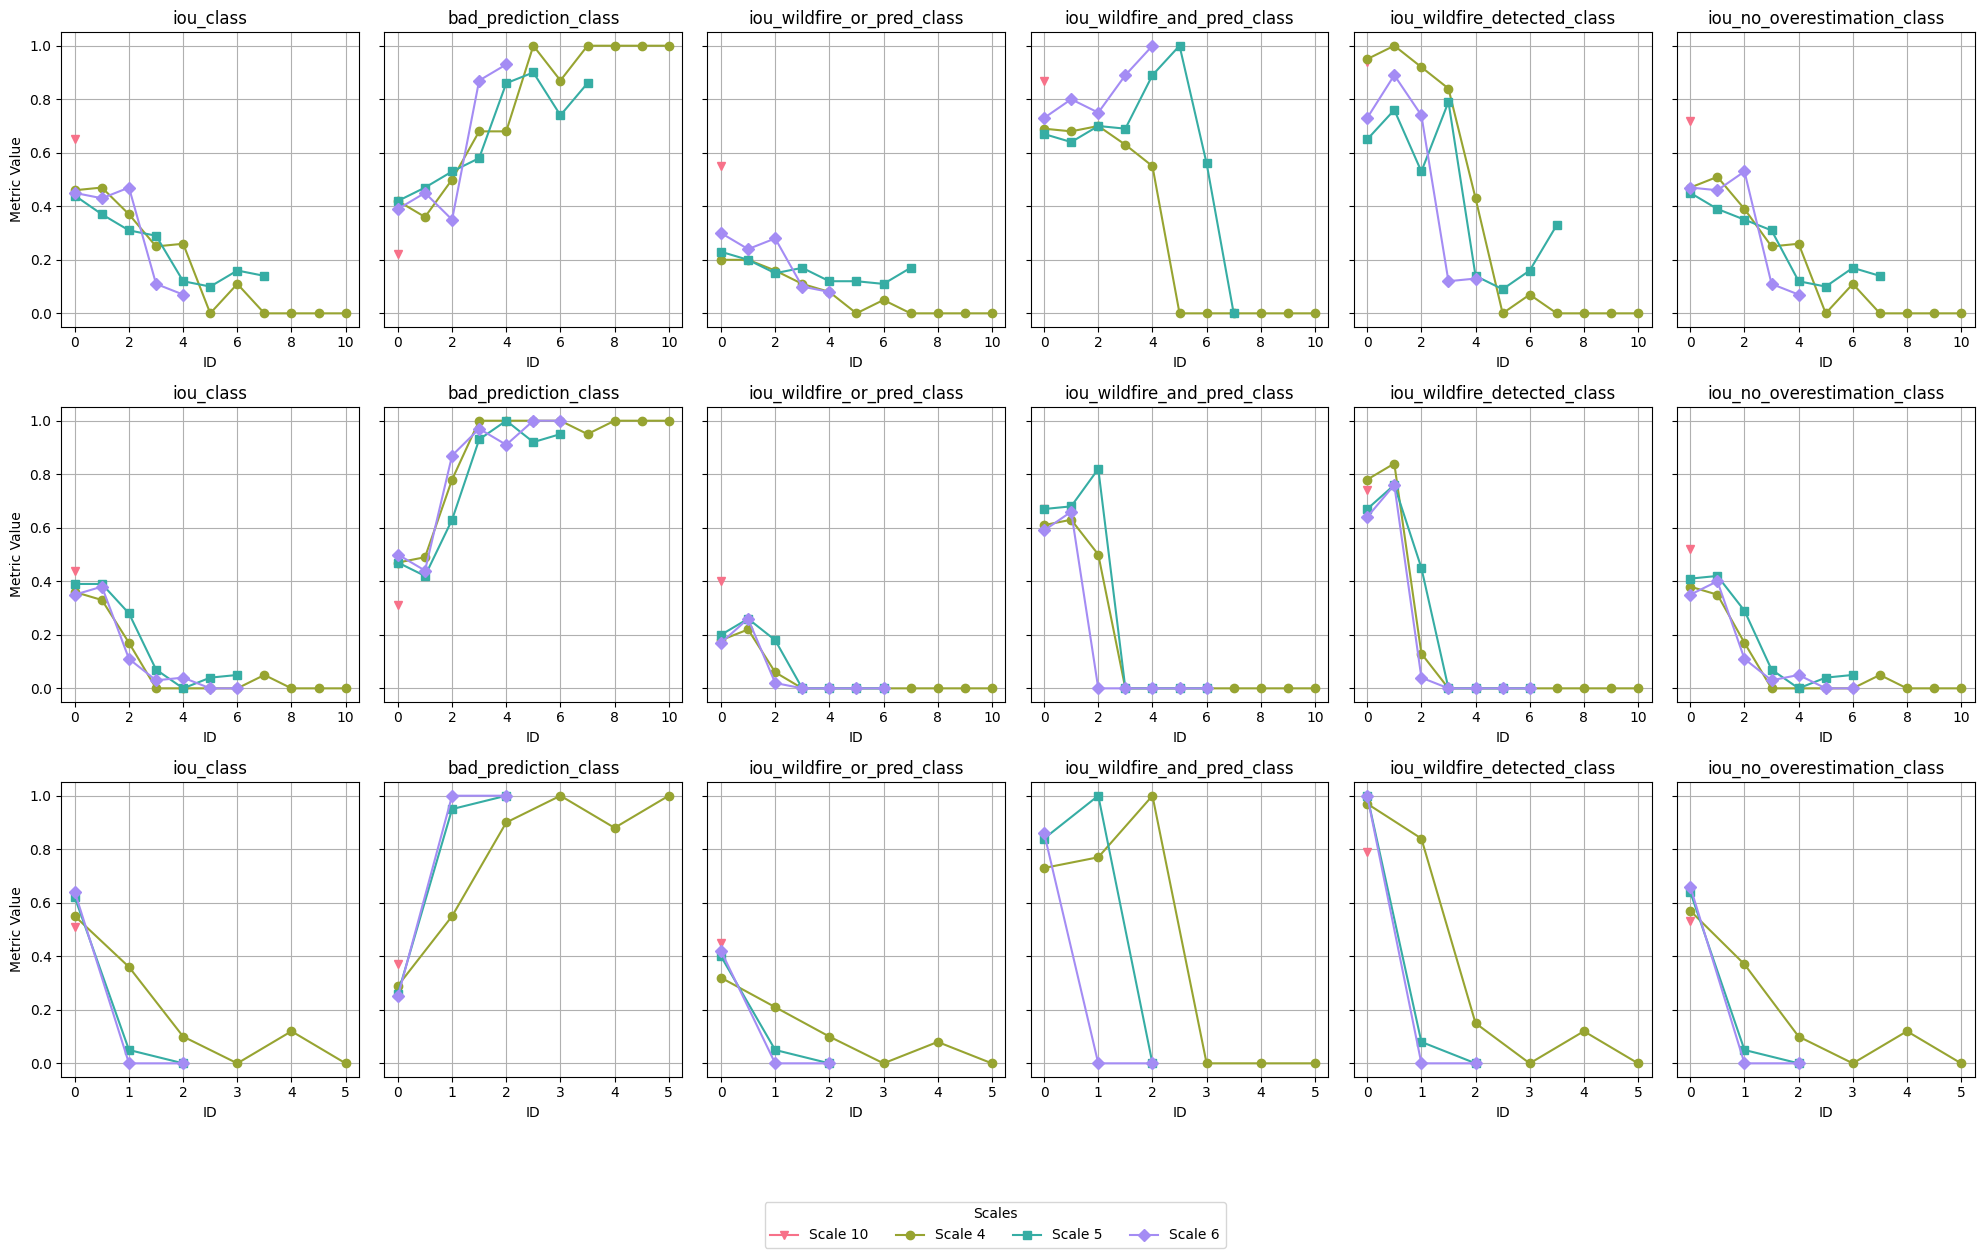

In [102]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

df2 = transform_dataframe_graph(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_graph(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_graph(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_graph(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

/tmp/ipykernel_596693/1465058234.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  columns = [item for item in columns if pd.Series(item).str.contains(pattern).any()]
/tmp/ipykernel_596693/1465058234.py:49: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(col).str.contains(pattern).any():


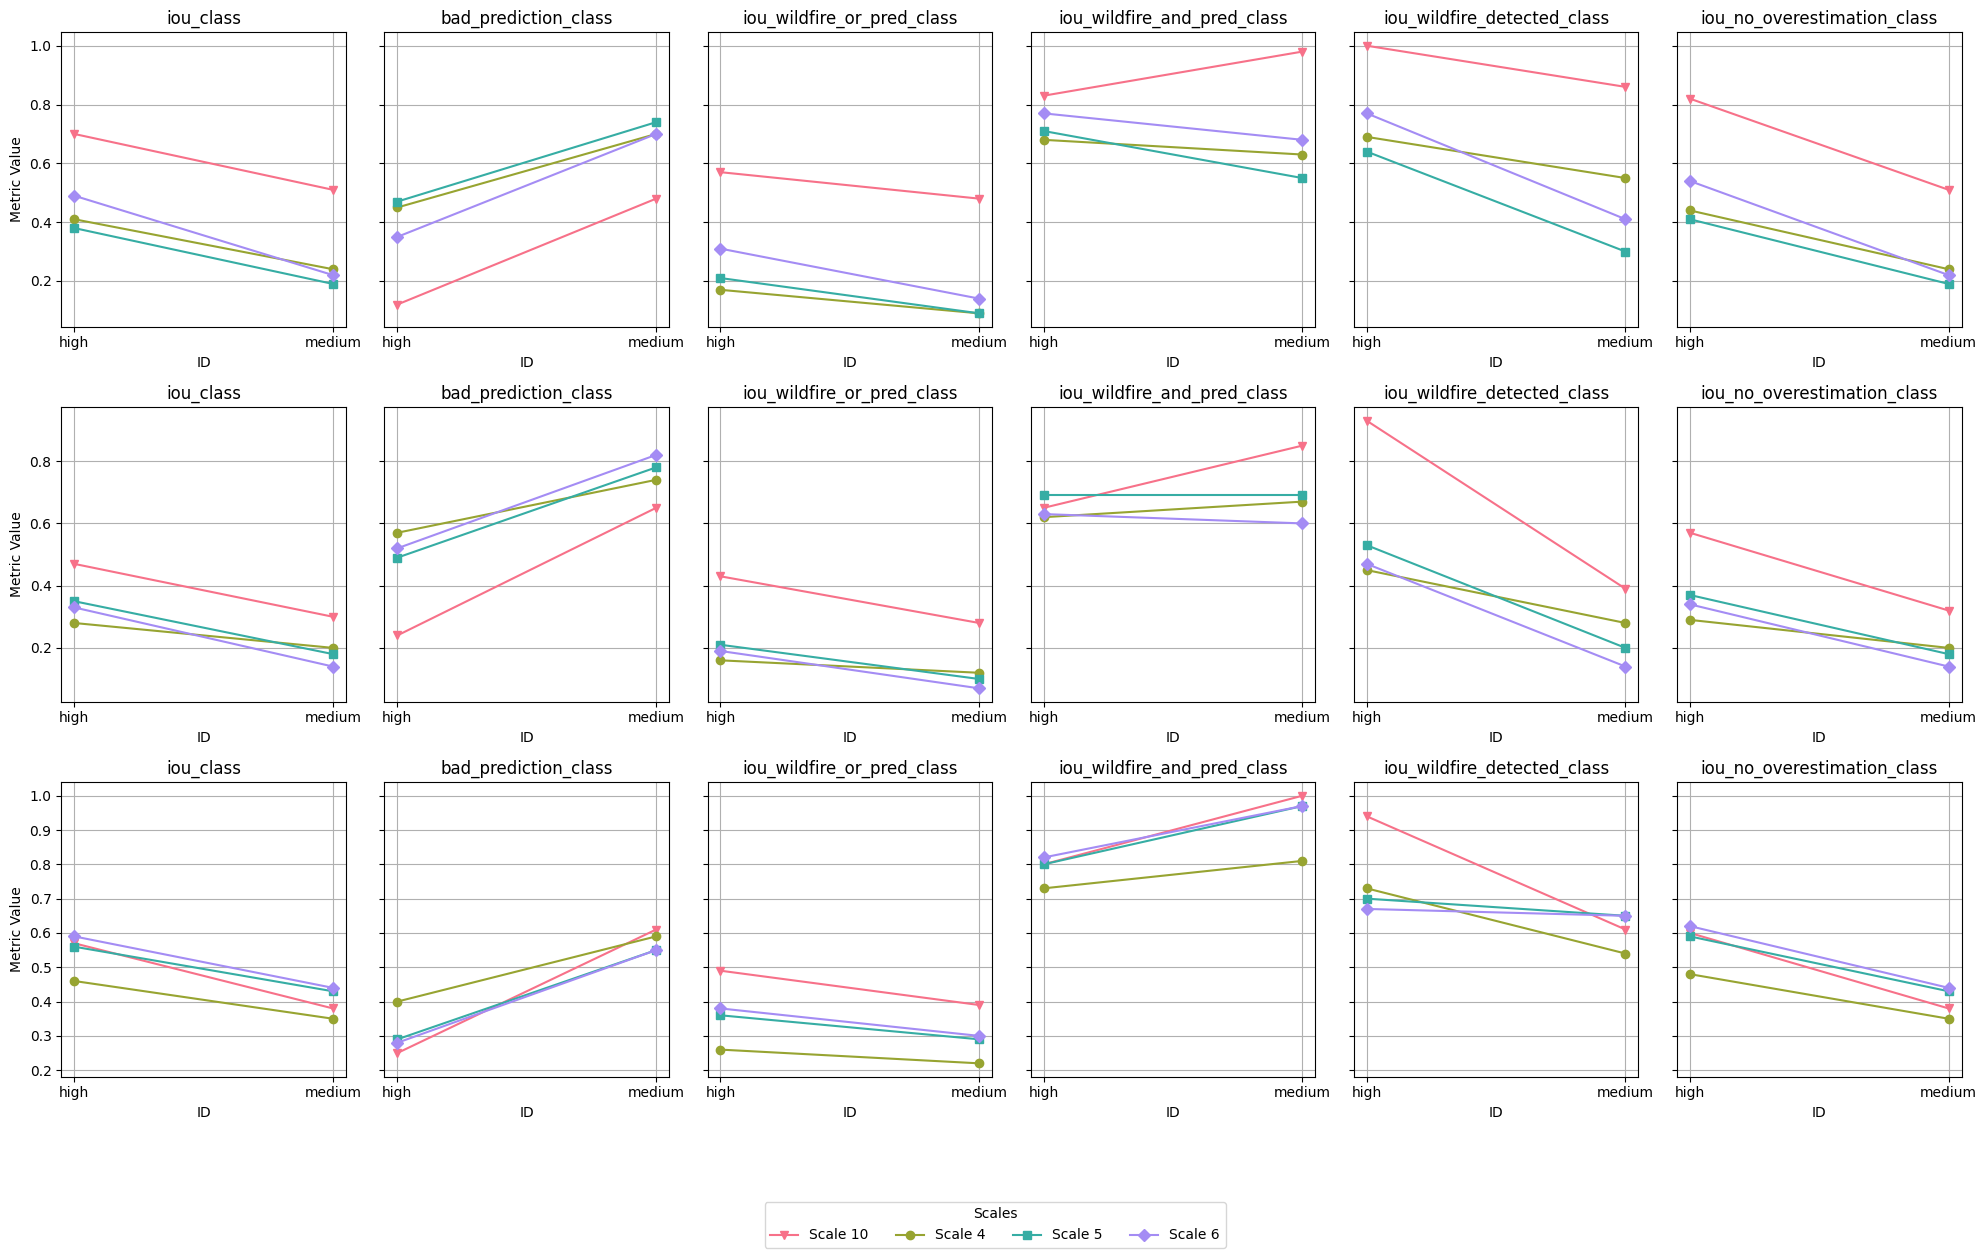

In [103]:
df_1 = df[(df['Number_of_samples'] == 'binary') & (df['Model'] == 'xgboost') & (df['Target'] == 'nbsinister-kmeans-5-Class-Dept-both') & (df['weight'] == 'one')].reset_index(drop=True)

df2 = transform_dataframe_season(df_1, columns, val_name='iou_class', id_prefix='iou_', id_suffix='_class')
df3 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_detected_class', id_prefix='iou_wildfire_detected_', id_suffix='_class')
df4 = transform_dataframe_season(df_1, columns, val_name='bad_prediction_class', id_prefix='bad_prediction_local_', id_suffix='_class')
df5 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_or_pred_class', id_prefix='iou_wildfire_or_pred_', id_suffix='_class')
df6 = transform_dataframe_season(df_1, columns, val_name='iou_wildfire_and_pred_class', id_prefix='iou_wildfire_and_pred_', id_suffix='_class')
df7 = transform_dataframe_season(df_1, columns, val_name='iou_no_overestimation_class', id_prefix='iou_no_overestimation_', id_suffix='_class')

df2 = df2.set_index(columns + ['ID']).join(df3.set_index(columns + ['ID'])['iou_wildfire_detected_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df4.set_index(columns + ['ID'])['bad_prediction_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df5.set_index(columns + ['ID'])['iou_wildfire_or_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df6.set_index(columns + ['ID'])['iou_wildfire_and_pred_class'], on=columns+['ID']).reset_index()
df2 = df2.set_index(columns + ['ID']).join(df7.set_index(columns + ['ID'])['iou_no_overestimation_class'], on=columns+['ID']).reset_index()

df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

compare_models3(df2, departement_list, dept_markers, metrics, col_to_analyse='ID', scale_col='Scale', dir_output=Path('.'), suffix='example')

In [104]:
,;

<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_596693/3322553283.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  ("")("")
/tmp/ipykernel_596693/3322553283.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  ("")("")
/tmp/ipykernel_596693/3322553283.py:1: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  ("")("")


TypeError: 'str' object is not callable

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import plotly.express as px  # Utilisé pour générer une palette de couleurs

def compare_models_2d(df, depts, dept_markers, metrics, col_to_analyse_1, col_to_analyse_2, col_link):
    """
    Compare models in 2D with the third dimension being the metric plotted as an axis.
    Points with the same value in `col_link` are connected in increasing order with a different color.
    Each plot is interactive and can be moved independently using Plotly.

    :param df: DataFrame containing the data.
    :param depts: List of departments to analyze.
    :param dept_markers: Dictionary mapping departments to plot markers.
    :param metrics: List of metrics to plot as Z-axis.
    :param col_to_analyse_1: First column to analyze on X-axis.
    :param col_to_analyse_2: Second column to analyze on Y-axis.
    :param col_link: Column used to connect points in the same group.
    """
    # Encode string values in col_to_analyse_1 and col_to_analyse_2 if necessary
    def encode_column(df, col_name):
        if df[col_name].dtype == 'object':  # Check if column is string-based
            unique_values = df[col_name].unique()
            value_map = {val: idx for idx, val in enumerate(unique_values)}
            df[f"{col_name}_encoded"] = df[col_name].map(value_map)
            return value_map  # Return the mapping for decoding
        else:
            df[f"{col_name}_encoded"] = df[col_name]  # Keep the original if numeric
            return None

    map_1 = encode_column(df, col_to_analyse_1)
    map_2 = encode_column(df, col_to_analyse_2)

    # Generate a unique color for each unique value in col_link
    unique_links = df[col_link].unique()
    colors = px.colors.qualitative.Plotly[:len(unique_links)]

    # Map each unique link to a specific color
    color_map = {link: colors[i % len(colors)] for i, link in enumerate(unique_links)}

    for dept in depts:
        df_filtered = df[df['Department'] == dept]

        # Create a subplot layout with one column per metric
        fig = make_subplots(
            rows=1, 
            cols=len(metrics), 
            specs=[[{'type': 'scatter3d'}] * len(metrics)],
            subplot_titles=[f"{dept} - {metric}" for metric in metrics]
        )

        for col_idx, metric in enumerate(metrics, start=1):
            # Add a trace for each unique value in col_link (to connect points belonging to the same group)
            for link_value in df_filtered[col_link].unique():
                subset = df_filtered[df_filtered[col_link] == link_value]

                # Sort the subset by the encoded columns for ordered plotting
                subset = subset.sort_values(by=[f"{col_to_analyse_1}_encoded", f"{col_to_analyse_2}_encoded"])

                fig.add_trace(
                    go.Scatter3d(
                        x=subset[f"{col_to_analyse_1}_encoded"],
                        y=subset[f"{col_to_analyse_2}_encoded"],
                        z=subset[metric],  # Plot original metric values on the Z-axis
                        mode='lines+markers',
                        marker=dict(
                            size=8,
                            color=color_map[link_value],  # Assign a unique color for each line
                        ),
                        line=dict(
                            color=color_map[link_value],  # Use the same color for the line
                            width=3  # Line width
                        ),
                        name=f"{link_value}",
                    ),
                    row=1, col=col_idx
                )

        # Update the layout to add titles and axis labels for each subplot
        fig.update_layout(
            height=900,  # Increased height
            width=800 * len(metrics),  # Increased width dynamically based on number of metrics
            title_text=f"3D Comparison for {dept}",
            showlegend=True
        )

        # Update axis labels for each subplot
        for i, metric in enumerate(metrics, start=1):
            fig.update_scenes(
                dict(
                    xaxis=dict(
                        title=col_to_analyse_1,
                        tickvals=list(map_1.values()) if map_1 else None,
                        ticktext=list(map_1.keys()) if map_1 else None
                    ),
                    yaxis=dict(
                        title=col_to_analyse_2,
                        tickvals=list(map_2.values()) if map_2 else None,
                        ticktext=list(map_2.keys()) if map_2 else None
                    ),
                    zaxis_title=metric
                ),
                row=1, col=i
            )

        # Show the combined figure for this department
        fig.show()


In [13]:
df.loc[df[df['Scale'] == 'departement'].index, 'Scale'] = 10

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
df['kdays']

In [16]:
#compare_models_2d(df, departement_list, dept_markers, ['apr', 'r2'],  'Target', 'Scale', 'Scale')

In [17]:
df['Scale'] = df['Scale'].astype(int)

In [ ]:
df['Department']

In [32]:
results = {}

for department in df['Department'].unique():
    results[department] = {
        'mean_metrique_by_target': {},
        'max_metrique_by_target': {}
    }
    for target in df[df['Department'] == department].Model.unique():
        mean_value = round(df[(df['Department'] == department) & (df['Model'] == target)]['iou_elt_3_class'].mean(), 2)
        #max_value = round(df[(df['Department'] == department) & (df['Target'] == target)]['iou_wildfire_graph_0_season_high_class'].max(), 2)

        results[department]['mean_metrique_by_target'][target] = mean_value
        #results[department]['max_metrique_by_target'][target] = max_value

results


{'departement-78-yvelines': {'mean_metrique_by_target': {'Dual-catboost-xgboost': 0.66,
   'xgboost': 0.6},
  'max_metrique_by_target': {}},
 'departement-25-doubs': {'mean_metrique_by_target': {'Dual-catboost-xgboost': 0.56,
   'xgboost': 0.57},
  'max_metrique_by_target': {}},
 'departement-01-ain': {'mean_metrique_by_target': {'Dual-catboost-xgboost': 0.62,
   'xgboost': 0.67},
  'max_metrique_by_target': {}}}

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['SS'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['bad_prediction_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_and_pred_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_class'],  'Model', 'Scale', 'Model')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_elt_1_class', 'iou_wildfire_or_pred_elt_2_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_elt_3_class', 'iou_wildfire_or_pred_elt_4_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred0_class', 'iou_wildfire_or_pred3_class'],  'Target', 'Scale', 'Target')

In [ ]:
compare_models_2d(df, departement_list, dept_markers, ['iou_wildfire_or_pred_high_class', 'iou_wildfire_or_pred_medium_class'],  'Target', 'Scale', 'Target')